In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import PatchCollection
from matplotlib.patches import Circle
from matplotlib.patches import Rectangle
import seaborn as sns
from scipy import stats
from scipy.ndimage import gaussian_filter1d
from statistics import mean 
import cv2
import pickle

In [3]:
# !!!!!!!!!!!!!!!!
#  if you already have saved dfs_splited_isnear_marks skip steps 0-4, make steps 5-8, skip steps 9-10, 
#  continue from the step 11

#!!!!!!!!!!!!!!!!!

#я пока не использую мышь 9.2

In [2]:
#0. open preprocessed trajectory data
#паузы исправлены
with open('preprocessed_dfs_subtraj_for_marks.pkl', 'rb') as fp:
    dfs_dict = pickle.load(fp)

In [3]:
#откроем словарь 0.3 с чтобы были 0.3 с и сразу смерджим его
with open('preprocessed_dfs_subtraj_0.3s.pkl', 'rb') as fp:
    dfs_03 = pickle.load(fp)

# merge dfs of each mouse
#dict, where subtrajectories of 1 mice are merged in 1 df (with time jumps)
#the first row from each df is deleted because it has V=0
merg_dfs_03 = {}

for k, df in dfs_03.items():
    df = [df0.iloc[1:].reset_index() for df0 in df]
    merg_dfs_03[k] = pd.concat(df)
    merg_dfs_03[k] = merg_dfs_03[k].reset_index(drop=True)

<Figure size 640x480 with 0 Axes>

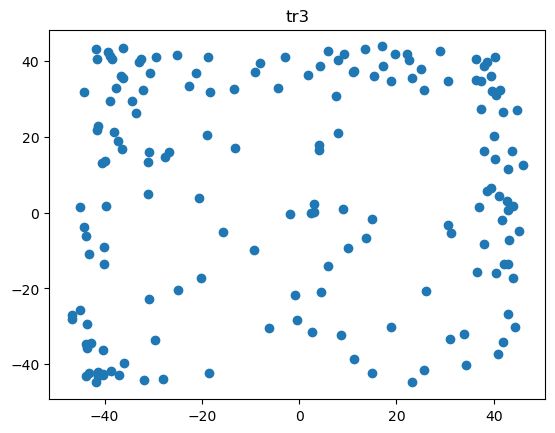

<Figure size 640x480 with 0 Axes>

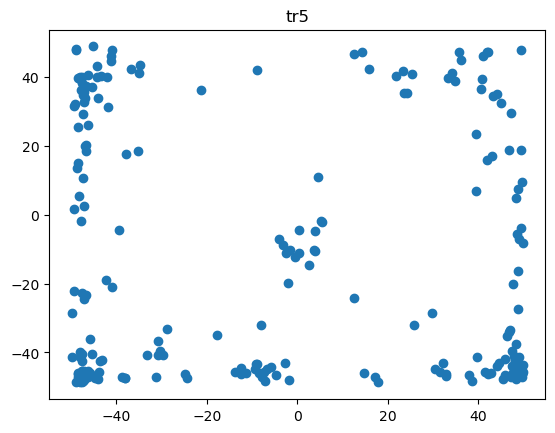

<Figure size 640x480 with 0 Axes>

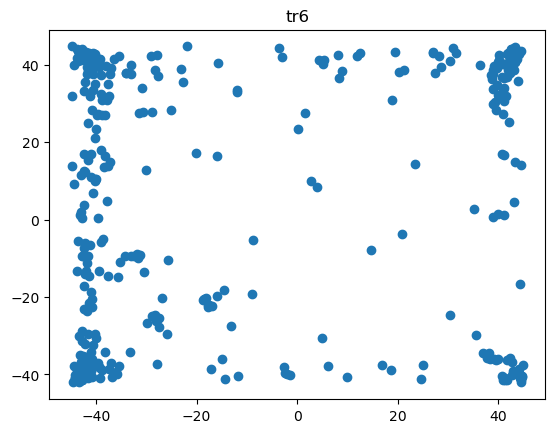

<Figure size 640x480 with 0 Axes>

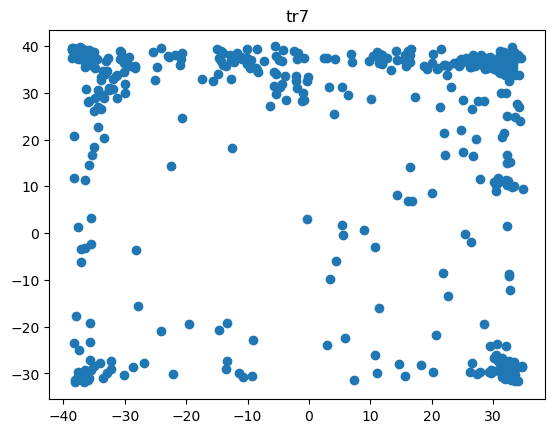

In [451]:
#графики остановок старого кода
# for i in range(len(names)):
#     plt.figure()
#     plotPauses(dfs[i])
#     plt.title(names[i])

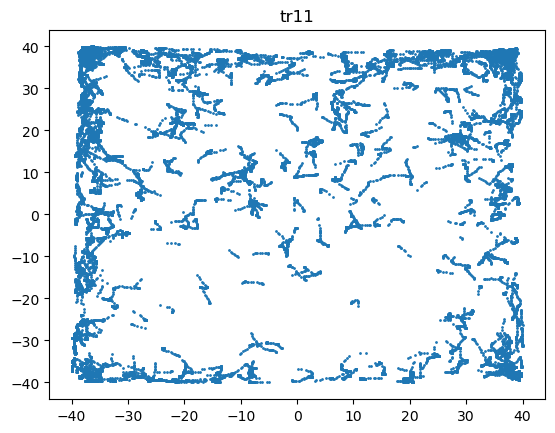

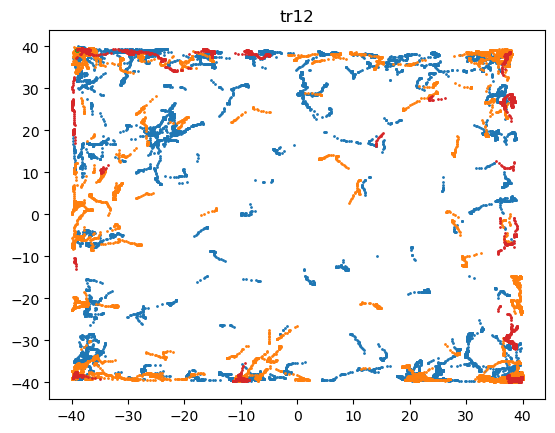

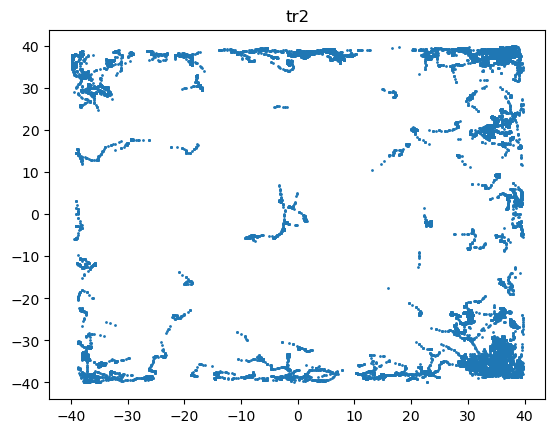

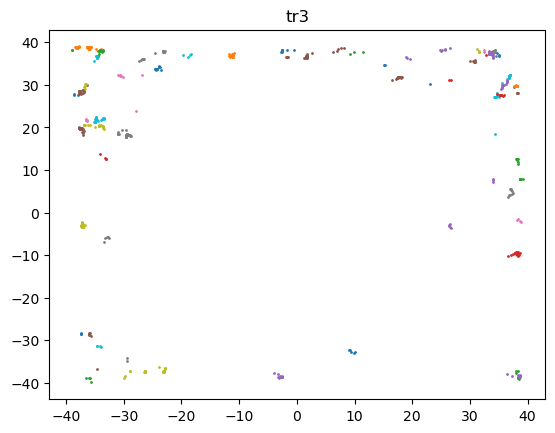

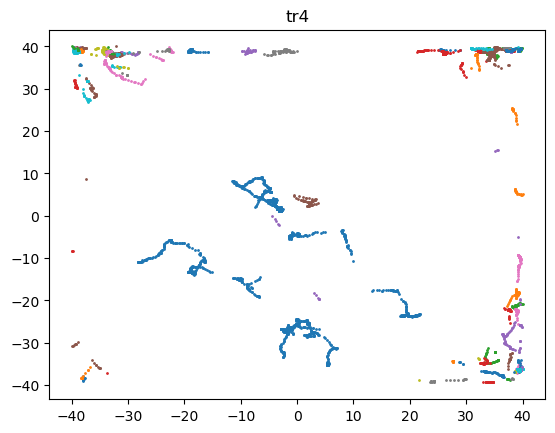

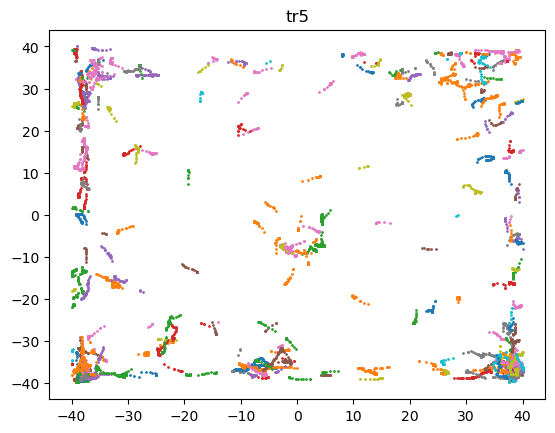

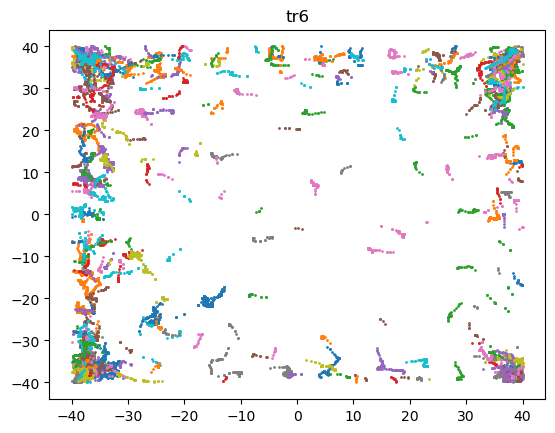

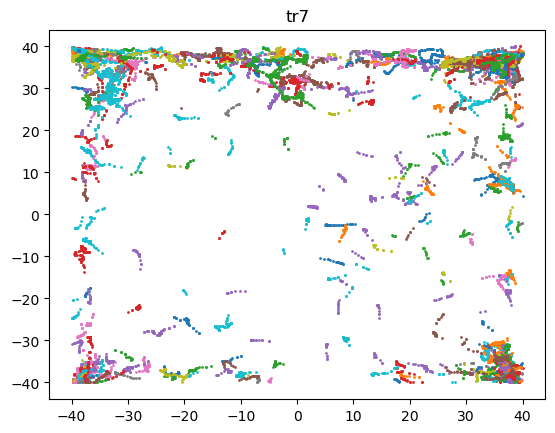

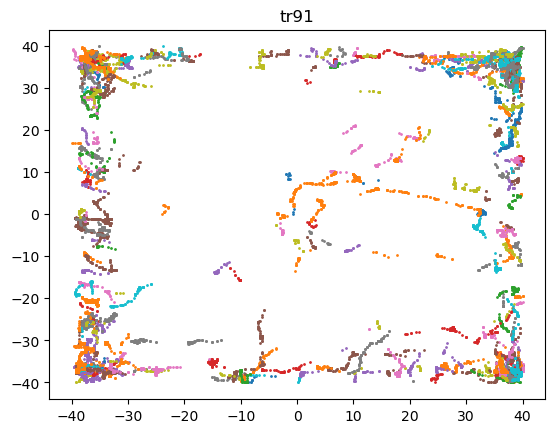

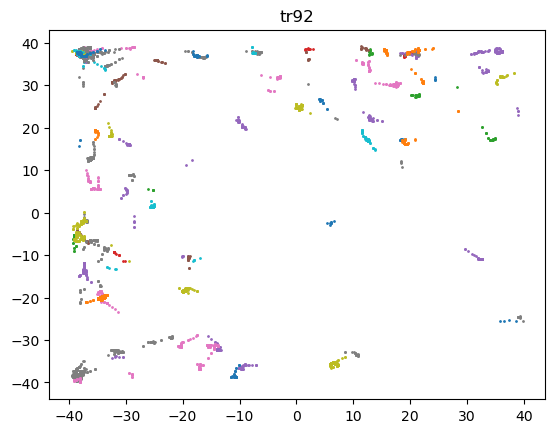

In [8]:
# (optional) 1. нарисуем точки, в которых мышь останавливалась

for k, df in dfs_dict.items():
    plt.figure()
    plt.title(k)
    for ldf in df:
        n_ldf = ldf.loc[ldf['movement']=='Stop']
        plt.scatter(n_ldf['x'], n_ldf['y'], s=1)
    plt.show()

In [4]:
#2. добавим в словарь фильтрованную скорость
def add_filtered_V(df, smooth_kern=2):
    dt = df['time'].diff()
    vx = df['x'].diff() / dt
    vy = df['y'].diff() / dt
    v = (vx**2 + vy**2)**0.5

    dt[0], vx[0], vy[0] = 0., 0., 0.
    v[0] = 0.
    df['Vx'] = gaussian_filter1d(vx, smooth_kern)  # TODO: why smoothing?
    df['Vy'] = gaussian_filter1d(vy, smooth_kern)
    df['V'] = gaussian_filter1d(v, smooth_kern)
    # df['Vx'].iloc[0] = 0.
    # df['Vy'].iloc[0] = 0.
    # df['V'].iloc[0] = 0.

    df.loc[0, 'Vx'] = 0.
    df.loc[0, 'Vy'] = 0.
    df.loc[0, 'V'] = 0.
    return df

for k, df in dfs_dict.items():
    sub_list = []
    i = 0
    for ldf in df:
        ldf = ldf.reset_index(drop=True)
        ldf = add_filtered_V(ldf)
        sub_list.append(ldf)
    dfs_dict[k] = sub_list

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_712\1315693949.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Vx'].iloc[0] = 0.
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_712\1315693949.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Vy'].iloc[0] = 0.
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_712\1315693949.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['V'].iloc[0] = 0.
C:\Users\Lenovo\AppData\Local\Temp\

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_712\1315693949.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Vx'].iloc[0] = 0.
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_712\1315693949.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Vy'].iloc[0] = 0.
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_712\1315693949.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['V'].iloc[0] = 0.
C:\Users\Lenovo\AppData\Local\Temp\

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_712\1315693949.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Vx'].iloc[0] = 0.
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_712\1315693949.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Vy'].iloc[0] = 0.
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_712\1315693949.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['V'].iloc[0] = 0.
C:\Users\Lenovo\AppData\Local\Temp\

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_712\1315693949.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Vx'].iloc[0] = 0.
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_712\1315693949.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Vy'].iloc[0] = 0.
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_712\1315693949.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['V'].iloc[0] = 0.
C:\Users\Lenovo\AppData\Local\Temp\

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_712\1315693949.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Vx'].iloc[0] = 0.
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_712\1315693949.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Vy'].iloc[0] = 0.
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_712\1315693949.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['V'].iloc[0] = 0.
C:\Users\Lenovo\AppData\Local\Temp\

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_712\1315693949.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Vy'].iloc[0] = 0.
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_712\1315693949.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['V'].iloc[0] = 0.
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_712\1315693949.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Vx'].iloc[0] = 0.
C:\Users\Lenovo\AppData\Local\Temp\

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_712\1315693949.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Vx'].iloc[0] = 0.
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_712\1315693949.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Vy'].iloc[0] = 0.
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_712\1315693949.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['V'].iloc[0] = 0.
C:\Users\Lenovo\AppData\Local\Temp\

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_712\1315693949.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Vx'].iloc[0] = 0.
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_712\1315693949.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Vy'].iloc[0] = 0.
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_712\1315693949.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['V'].iloc[0] = 0.
C:\Users\Lenovo\AppData\Local\Temp\

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_712\1315693949.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Vx'].iloc[0] = 0.
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_712\1315693949.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Vy'].iloc[0] = 0.
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_712\1315693949.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['V'].iloc[0] = 0.
C:\Users\Lenovo\AppData\Local\Temp\

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_712\1315693949.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Vx'].iloc[0] = 0.
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_712\1315693949.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Vy'].iloc[0] = 0.
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_712\1315693949.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['V'].iloc[0] = 0.
C:\Users\Lenovo\AppData\Local\Temp\

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_712\1315693949.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Vx'].iloc[0] = 0.
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_712\1315693949.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Vy'].iloc[0] = 0.
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_712\1315693949.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['V'].iloc[0] = 0.
C:\Users\Lenovo\AppData\Local\Temp\

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_712\1315693949.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Vx'].iloc[0] = 0.
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_712\1315693949.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Vy'].iloc[0] = 0.
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_712\1315693949.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['V'].iloc[0] = 0.
C:\Users\Lenovo\AppData\Local\Temp\

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_712\1315693949.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Vx'].iloc[0] = 0.
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_712\1315693949.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Vy'].iloc[0] = 0.
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_712\1315693949.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['V'].iloc[0] = 0.
C:\Users\Lenovo\AppData\Local\Temp\

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_712\1315693949.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Vx'].iloc[0] = 0.
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_712\1315693949.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Vy'].iloc[0] = 0.
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_712\1315693949.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['V'].iloc[0] = 0.
C:\Users\Lenovo\AppData\Local\Temp\

In [5]:
#3. merge dfs of 1 mouse

# merge dfs of each mouse
#dict, where subtrajectories of 1 mice are merged in 1 df (with time jumps)
#the first row from each df is deleted because it has V=0
merg_dfs_dict = {}

for k, df in dfs_dict.items():
    df = [df0.iloc[1:].reset_index() for df0 in df]
    merg_dfs_dict[k] = pd.concat(df)
    merg_dfs_dict[k] = merg_dfs_dict[k].reset_index(drop=True)

In [6]:
##4. split the table by time

start_end = {
'tr3': [1.268, 1567.099],
'tr5': [1.068, 1754.786],
'tr6': [1.068, 1662.261],
'tr7': [1.068, 1635.601],
'tr91': [1.068, 1463],
'tr92': [1.068, 645] }
#некоторые мыши (91, 92) под конец записи сидят на 1 месте
used_mice = ['tr3','tr5','tr6','tr7','tr91']
#может лучше в словарь запихнуть только используемых мышей

def cut_df(df_to_cut, n_of_parts, t1, t2):
    dur_of_part = (t2 - t1) / n_of_parts
    parts = []
    for i in range(n_of_parts):
        t1_local = t1 + dur_of_part * i
        t2_local = t1 + dur_of_part * (i+1)
        part_df = df_to_cut.loc[(df_to_cut['time'] > t1_local) & (df_to_cut['time'] < t2_local)]
        parts.append(part_df)
    return parts

In [12]:
n_to_split = 3
splited_dfs = {}
for m in used_mice:
    splited_dfs[m] = cut_df(merg_dfs_dict[m], n_to_split,
                            start_end[m][0], start_end[m][1])

In [14]:
# ##4. последние 10 минут - строим по ним остановки, добавляем в словарь steps_xx_yy = {} - старое

# def cut10min(df):
#     t2 = df['time'].max()
#     t1 = t2 - 600
#     df = df.loc[(df['time'] > t1) & (df['time'] < t2)]
#     return df

# dfs_small = {}
# for i in ['tr3','tr5','tr6','tr7']:
#     dfs_small[i] = cut10min(merg_dfs_dict[i])

# dfs_small['tr91'] = merg_dfs_dict['tr91'].loc[(merg_dfs_dict['tr91']['time'] > 860) & (merg_dfs_dict['tr91']['time'] < 1460)]

# dfs_small['tr92'] = merg_dfs_dict['tr92'].loc[(merg_dfs_dict['tr92']['time'] > 55) & (merg_dfs_dict['tr92']['time'] < 655)]

точек так мало т к берем только 10 минут записи

### строим метки

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_3744\696015376.py:18: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(df['x'], df['y'],'bo', color='black',markersize=3)


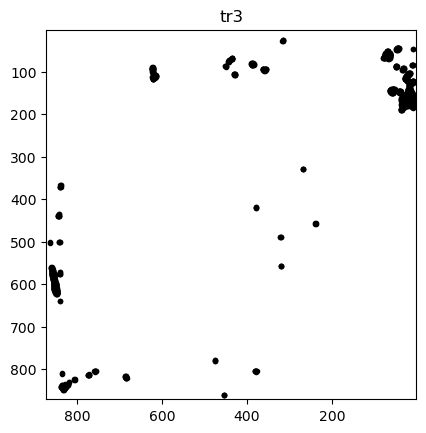

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_3744\696015376.py:18: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(df['x'], df['y'],'bo', color='black',markersize=3)


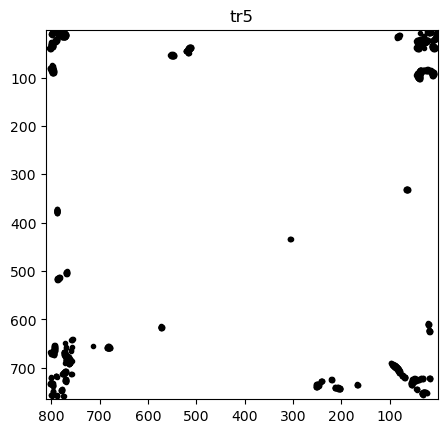

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_3744\696015376.py:18: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(df['x'], df['y'],'bo', color='black',markersize=3)


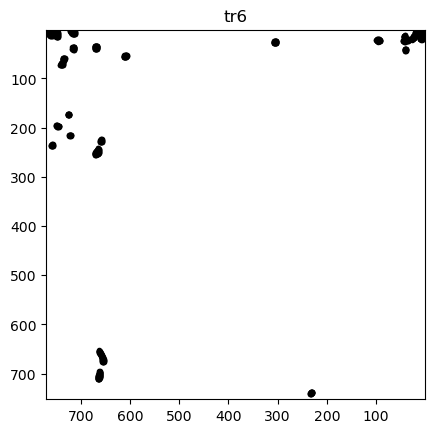

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_3744\696015376.py:18: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(df['x'], df['y'],'bo', color='black',markersize=3)


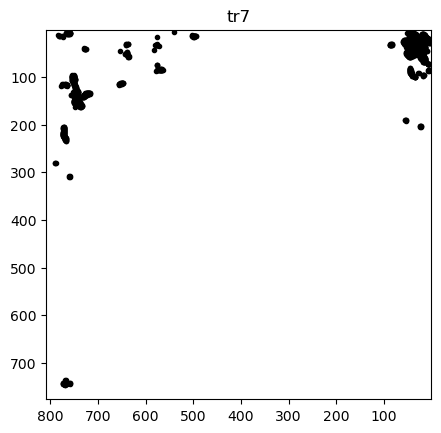

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_3744\696015376.py:18: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(df['x'], df['y'],'bo', color='black',markersize=3)


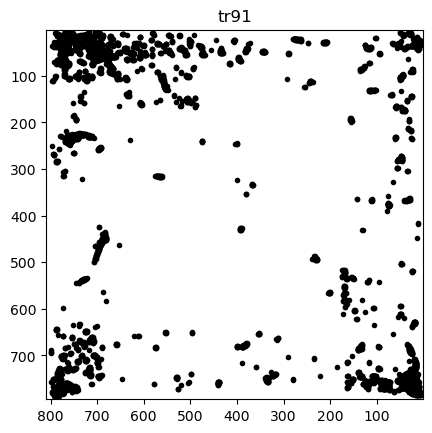

In [2]:
#5 из считанной картинки с метками делаем таблицу с координатами красных пикселей
def RedDFFromIm(im, k=''):
    coords = []
    #так, я поменяла местами х и у и соответсвенно хмакс умакс
    #вернула как было
    xmax = im.shape[0]
    ymax = im.shape[1]
    for i in range(len(im)):
        for j in range(len(im[i])):
            if (int(im[i][j][2]) - int(im[i][j][0]) > 15) and (int(im[i][j][2]) - int(im[i][j][0]) > 15):
                coords.append([i,j,im[i][j][2],im[i][j][1],im[i][j][0]])
    df = pd.DataFrame(coords, columns =['x', 'y', 'red', 'green', 'blue'])
    fig, ax = plt.subplots()
    ax.set_xlim(xmax)
    ax.set_ylim(ymax)
    ax.set_aspect('equal', adjustable='box')
    plt.title(k)
    plt.plot(df['x'], df['y'],'bo', color='black', markersize=3)
    #sns.scatterplot(data=df, ax=ax, x="x", y="y",marker='.')
    plt.show()
    marks = {'df':df, 'xmax':xmax, 'ymax':ymax}
    return(marks)

im3 = cv2.imread("C:\\Users\\Lenovo\\1navigation\\mark_3.png")
im5 = cv2.imread("C:\\Users\\Lenovo\\1navigation\\mark_5.png")
im6 = cv2.imread("C:\\Users\\Lenovo\\1navigation\\mark_6.png")
im7 = cv2.imread("C:\\Users\\Lenovo\\1navigation\\mark_7.png")
im91 = cv2.imread("C:\\Users\\Lenovo\\1navigation\\mark_9.1.png")
im92 = cv2.imread("C:\\Users\\Lenovo\\1navigation\\mark_9.2.png")
marks = {}
used_mice = ['tr3','tr5','tr6','tr7','tr91']

marks['tr3'] = RedDFFromIm(im3,'tr3')
marks['tr5'] = RedDFFromIm(im5,'tr5')
marks['tr6'] = RedDFFromIm(im6,'tr6')
marks['tr7'] = RedDFFromIm(im7,'tr7')
marks['tr91'] = RedDFFromIm(im91,'tr91')
#marks['tr92'] = RedDFFromIm(im92)

In [3]:
#6 переводим метки и траекотрии в 1 координаты
for m in used_mice:
    if (marks[m]['df']['y'].max() > 50) and (marks[m]['df']['x'].max() > 50):
        # сейчас у нас у всех мышей нормировано поле: от -40 до 40 по каждой оси
        k_y = 80 / (marks[m]['ymax'])
        b_y = -40

        for i in range(len(marks[m]['df']['y'])):
            marks[m]['df']['y'][i] = marks[m]['df']['y'][i] * k_y + b_y

        k_x = (80 / (marks[m]['xmax']))
        b_x = -40

        for i in range(len(marks[m]['df']['x'])):
            marks[m]['df']['x'][i] = marks[m]['df']['x'][i] * k_x + b_x
    else:
        print(m, 'is already done')

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_3744\313701182.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  marks[m]['df']['y'][i] = marks[m]['df']['y'][i] * k_y + b_y
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_3744\313701182.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  marks[m]['df']['x'][i] = marks[m]['df']['x'][i] * k_x + b_x


<!-- # сейчас у нас у всех мышей нормировано поле: от -40 до 40 по каждой оси
k_y = 80 / (marks['tr3']['ymax'])
print(k_y)
b_y = -40
#print(b_y)

for i in range(len(marks['tr3']['df']['y'])):
    marks['tr3']['df']['y'][i] = marks['tr3']['df']['y'][i] * k_y + b_y
     -->

Text(0.5, 1.0, 'tr3')

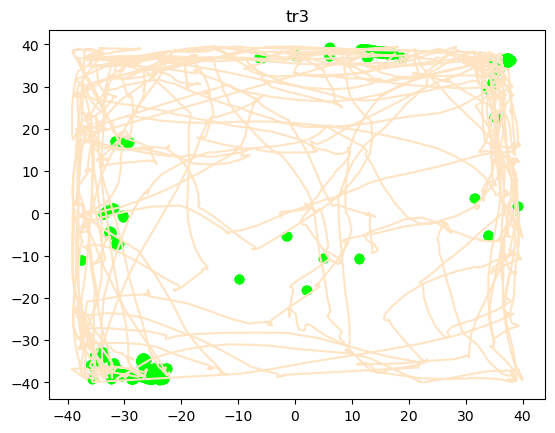

In [18]:
#вроде так верно
plt.scatter(marks['tr3']['df']['y'],marks['tr3']['df']['x'],c='lime')
plt.plot(merg_dfs_dict['tr3']['x'],merg_dfs_dict['tr3']['y'],c='bisque')
plt.title('tr3')

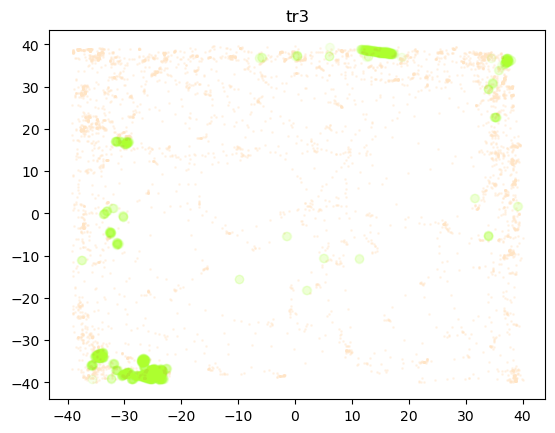

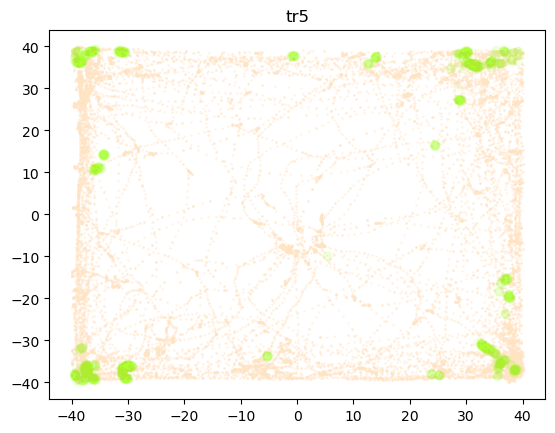

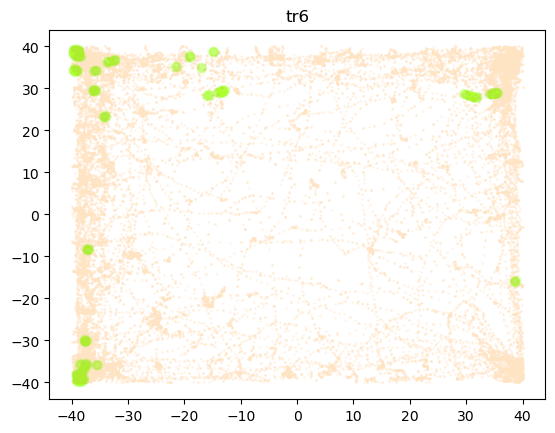

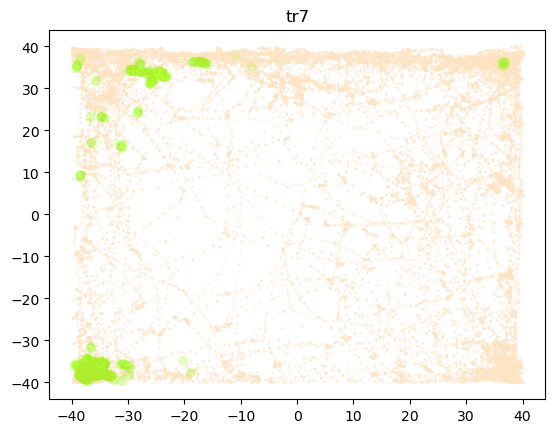

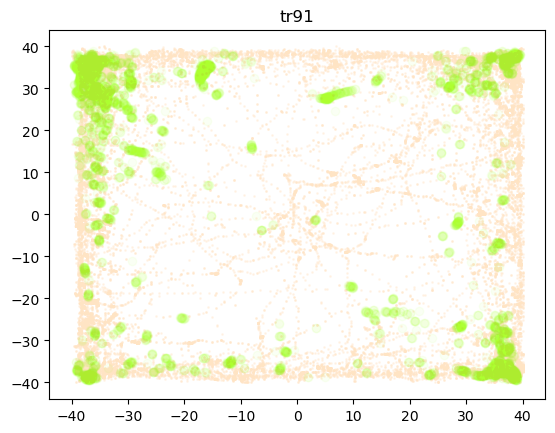

In [28]:
#presenattion
for n in used_mice:
    #вроде так верно
    #plt.scatter(marks[n]['df']['y'],marks[n]['df']['x'],c='greenyellow',alpha=0.2)
    plt.scatter(merg_dfs_dict[n]['x'],merg_dfs_dict[n]['y'],c='bisque',alpha=0.3,s=1)
    plt.scatter(marks[n]['df']['y'],marks[n]['df']['x'],c='greenyellow',alpha=0.05)
    plt.title(n)
    plt.show()

In [5]:
#presentation около стены последние 10 минут
rvs1 = [2.313541466, 3.582903527, 5.770884095, 4.618573825,2.644639161]
rvs2 = [1.47504506433078,
1.44618943440355,
1.64030576935912,
1.45766957087906,
1.64984653974011]
stats.ttest_ind(rvs1, rvs2)

Ttest_indResult(statistic=3.520339331741599, pvalue=0.007842008957157733)

In [6]:
#presentation около стены последние 10 минут
from scipy.stats import mannwhitneyu
U1, p = mannwhitneyu(rvs1, rvs2, method="exact")
print(U1)
print(p)

25.0
0.007936507936507936


In [7]:
#метки и остановки
#presentation
#почему пауз стало больше? #TODO
for k, df_n in splited_dfs.items():
    df = df_n[2]
    df_stop = df.loc[df['movement']=='Stop']
    plt.scatter(df_stop['x'], df_stop['y'],c='k')
    plt.scatter(marks['tr3']['df']['y'],marks['tr3']['df']['x'],c='greenyellow',alpha=0.2)
    plt.title(k)
    plt.show()

NameError: name 'splited_dfs' is not defined

In [11]:
# plt.scatter(marks['tr5']['df']['y'],marks['tr5']['df']['x'],c='lime')
# plt.plot(merg_dfs_dict['tr5']['x'],merg_dfs_dict['tr5']['y'],c='bisque')
# plt.title('tr5')


In [12]:
# plt.plot(merg_dfs_dict['tr7']['x'],merg_dfs_dict['tr7']['y'],c='bisque',alpha=0.7)
# plt.scatter(marks['tr7']['df']['y'],marks['tr7']['df']['x'],c='lime')
# plt.title('tr7')


In [12]:
#7 функция окууп карта меток dfHM

#на вход нужна таблица с time x y 

#блин бин х это y с тз траджа... ну аутпут беру верный. Хотя щас уже наоборот...

#parameter to change!!!!! n

def make_occup_map(marks_i, xmi=-40, xma=40, ymi=-40, yma=40, n=20):
    df = marks_i['df']
    binx = np.linspace(xmi, xma, n+1)
    #x_cut = pd.cut(df.X, binx, right=False)
    x_cut = pd.cut(df['x'], binx, right=False)

    biny = np.linspace(ymi, yma, n+1)
    #y_cut = pd.cut(df.Y, biny, right=False)
    y_cut = pd.cut(df['y'], biny, right=False)

    dfn = df.groupby([x_cut, y_cut]).count()
    
    L = [(a.mid, b.mid) for a, b in dfn.index]
    dfm = dfn.set_index(pd.MultiIndex.from_tuples(L, names=dfn.index.names))
    dfm = dfm.drop(columns=['x','y', 'green', 'blue'])
    dd = dfm.unstack()
    dd = dd.replace(0, 1.e-1)
    arrd = dd.to_numpy()
    arrsrsr = np.sqrt(np.sqrt(np.sqrt(arrd)))
    kk = (arrsrsr - np.amin(arrsrsr)) / (np.amax(arrsrsr) - np.amin(arrsrsr))
    kk = pd.DataFrame(kk)
    kk = kk.iloc[::-1]
    #kk = kk.iloc[:, ::-1]
    sns.heatmap(kk, square=True)
    #sns.heatmap(kk, square=True, xticklabels=False, yticklabels=False)
    return(kk, binx, biny)

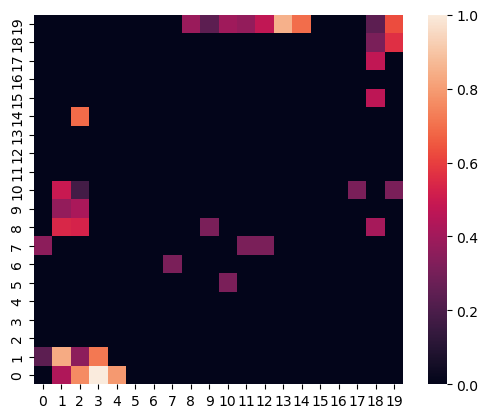

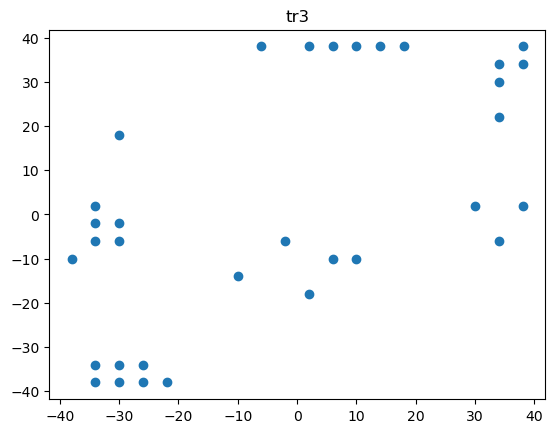

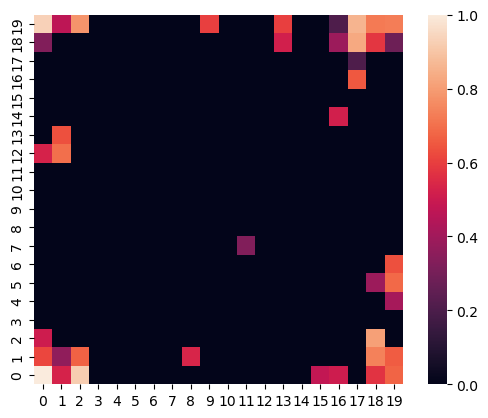

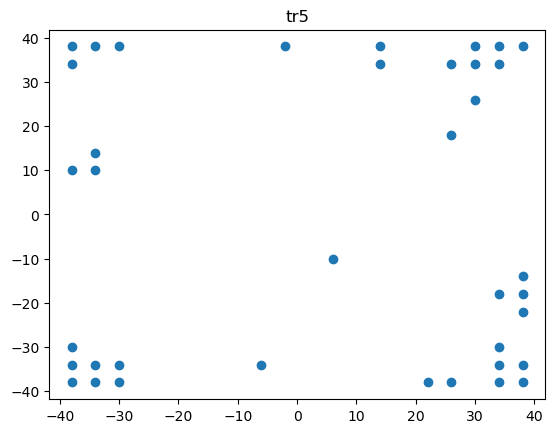

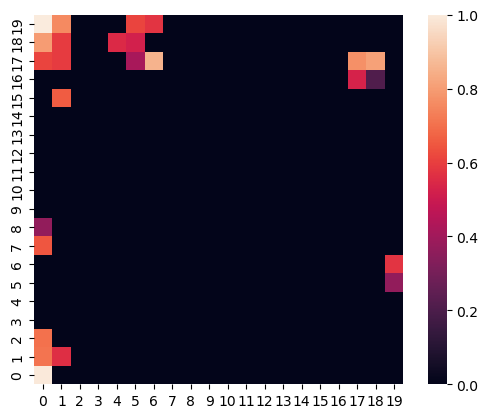

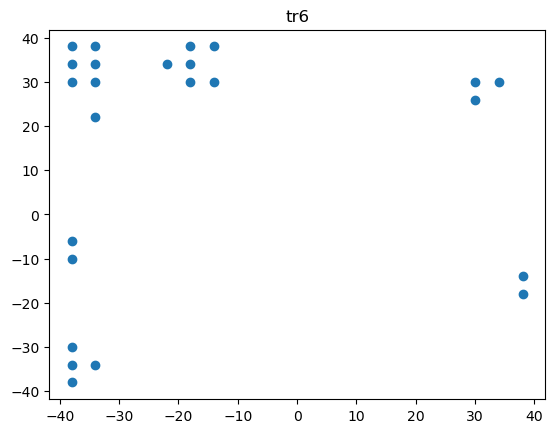

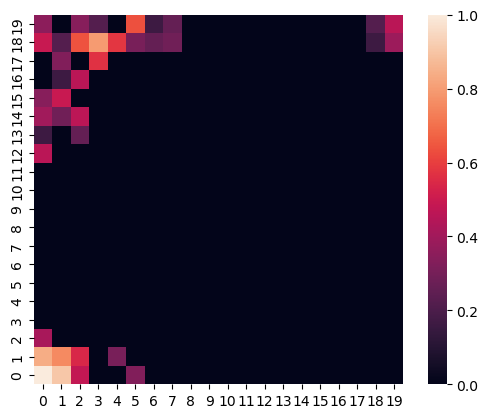

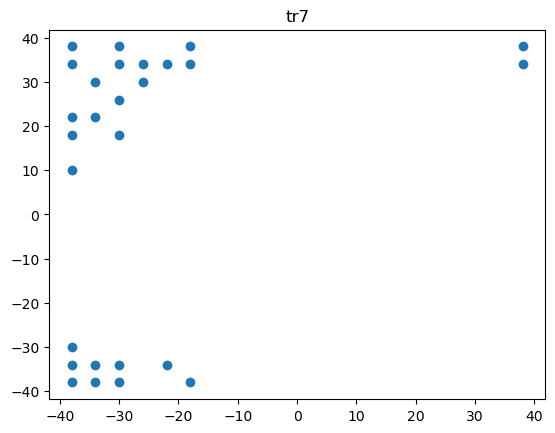

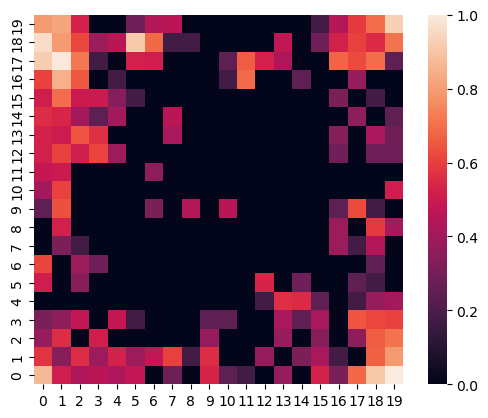

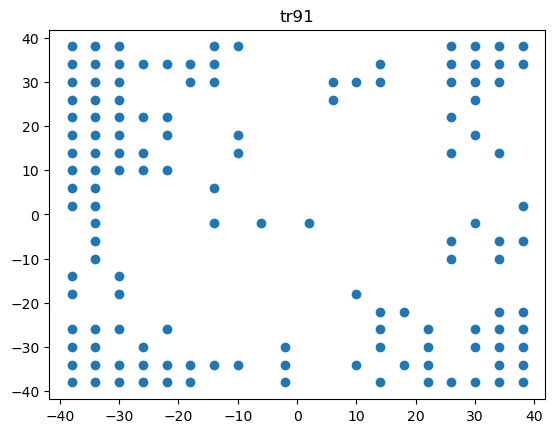

In [13]:
#8 делаем координаты новых "меток" - центров квадратов, в которых достаточно много меток

def heat_maps_with_coords(marksN,tit=' ', bord_trN={'xmi':-40,'xma':40,'ymi':-40,'yma':40}, show=True):
    # 1) build occupation (heat) map of marks
    dfHM, binx, biny = make_occup_map(marksN,n=20)
    # 2) occ map in which indices are coordinates
    binxmid = []
    for i in range(len(binx)):
        if i != 0:
            binxmid.append((binx[i]+binx[i-1])/2)
    binymid = []
    for i in range(len(biny)):
        if i != 0:
            binymid.append((biny[i]+biny[i-1])/2)

    dfHM.index = binxmid[::-1]
    dfHM.columns = binymid
    # 3) take coordinates of cells with sufficient amount of urine marks 
    #вытащим координаты квадратов где довольно много меток
    #координаты меток
    # т е i это y (row) а j это x (column)
    #parameter to change 0.3
    trN_coords = []
    for i in range(dfHM.shape[0]-1, -1, -1):
        for j in range(dfHM.shape[1]):
            if dfHM.iloc[i, j] > 0.3:
                #print(dfHM.index[i], dfHM.columns[j])
                trN_coords.append((dfHM.columns[j], dfHM.index[i]))
    if show:
        plt.figure()
        trN_coords_x = [i[0] for i in trN_coords]
        trN_coords_y = [i[1] for i in trN_coords]
        plt.scatter(trN_coords_x,trN_coords_y)
        plt.title(tit)
        plt.show()
    return trN_coords

hm_marks_coords = {}
for n in used_mice:
    hm_marks_coords[n] = heat_maps_with_coords(marks[n],tit=n)
    

    
    
    

In [18]:
#(9) (additional) make pictures to compare areas of marks surroundings vs rgegular space

In [24]:
r1 = 2
r2 = 3 * r1

In [73]:
# for r in [r1,r2]:
#     for n in used_mice:
#         fig, ax = plt.subplots(figsize=(6,6))
#         patches = []
#         coords = hm_marks_coords[n]
#         for c in coords:
#             circle = Circle((c[0], c[1]), r)
#             patches.append(circle) 
#         p = PatchCollection(patches, alpha=1,color='blue')
#         ax.add_collection(p)
#         plt.xlim(-40, 40)
#         plt.ylim(-40, 40)
#         name = n +', r = ' + str(r)
#         plt.title(name)
#         #plt.savefig("C:\\Users\\Lenovo\\1navigation\\circles_2024_marks_surr\\"+name)
#         plt.show()
        
        

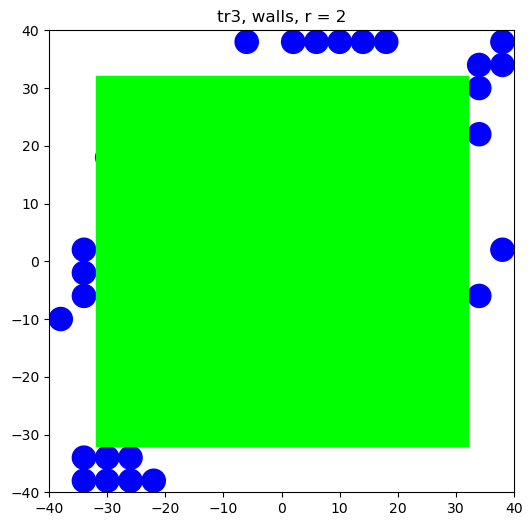

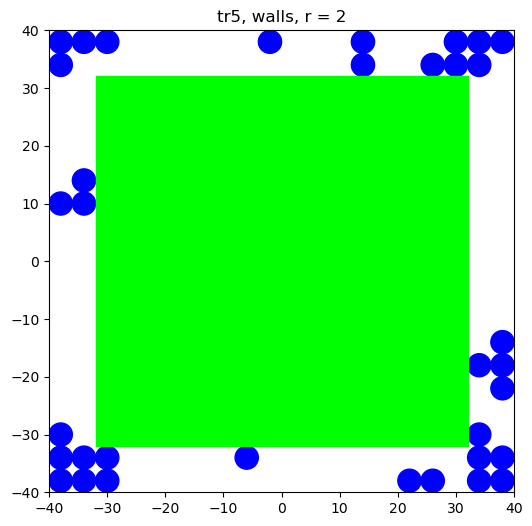

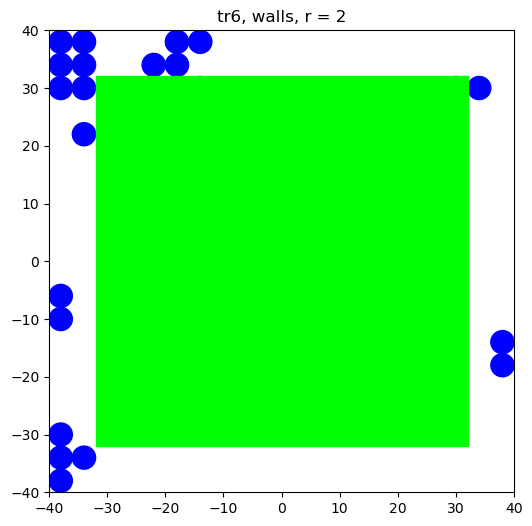

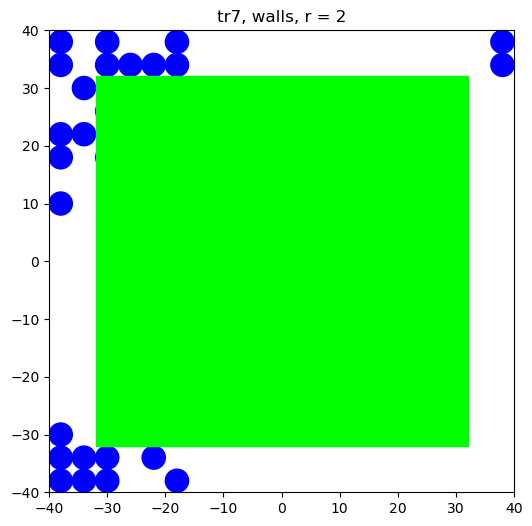

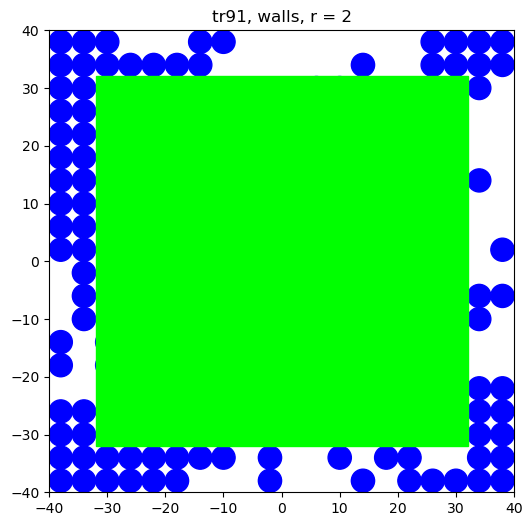

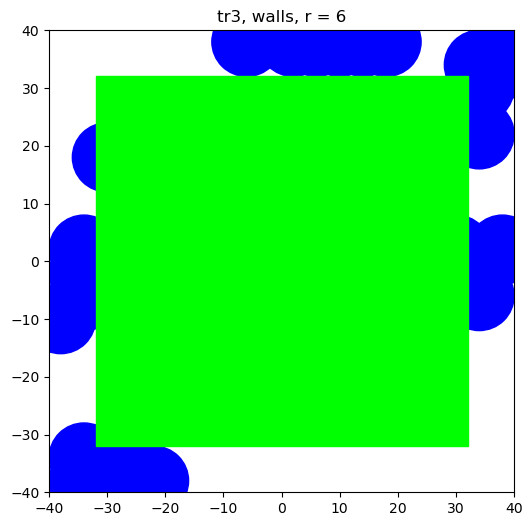

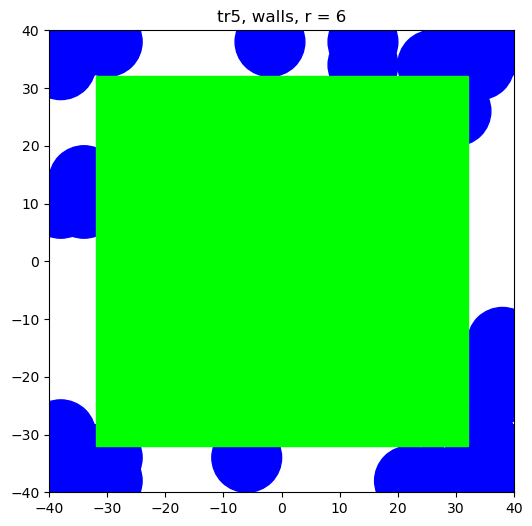

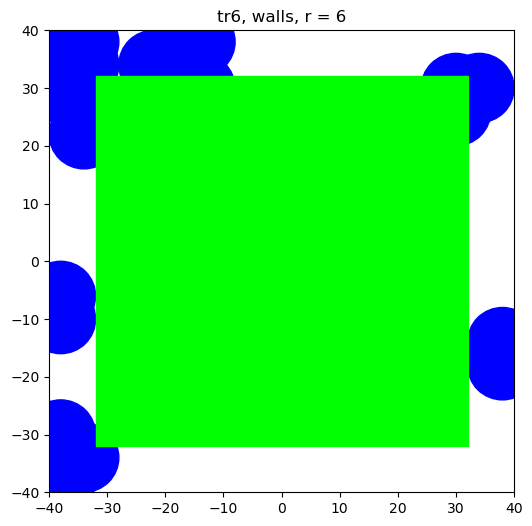

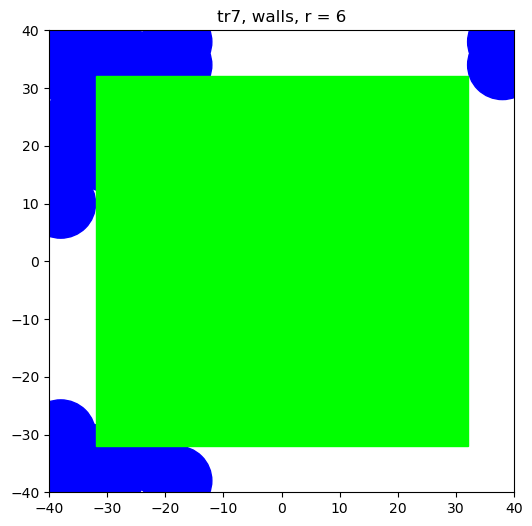

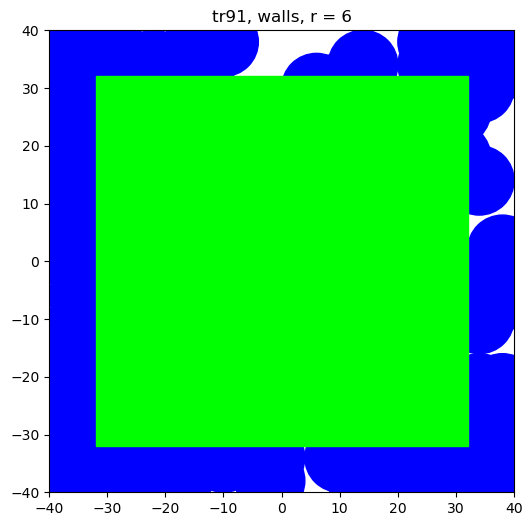

In [26]:
#уже можно не запускать
for r in [r1,r2]:
    for n in used_mice:
        fig, ax = plt.subplots(figsize=(6,6))
        patches = []
        coords = hm_marks_coords[n]
        for c in coords:
            circle = Circle((c[0], c[1]), r)
            patches.append(circle)
        square = Rectangle((-32, -32), 64, 64, color=(0, 1, 0))
        ax.add_patch(square)
        p = PatchCollection(patches, alpha=1,color='blue')
        ax.add_collection(p)
        plt.xlim(-40, 40)
        plt.ylim(-40, 40)
        name = n + ', walls' + ', r = ' + str(r)
        plt.title(name)
        #plt.savefig("C:\\Users\\Lenovo\\1navigation\\circles_2024_marks_surr\\"+name)
        plt.show()
        
        

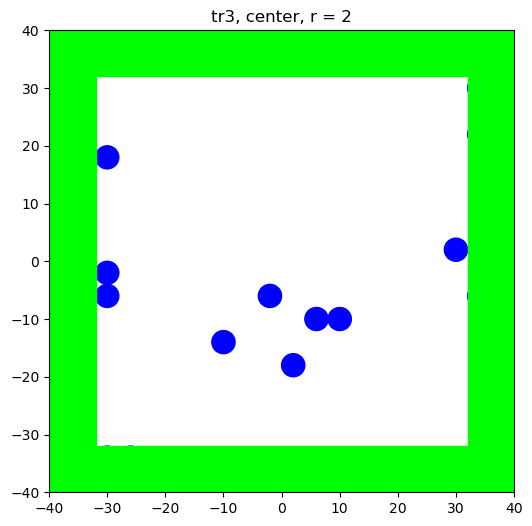

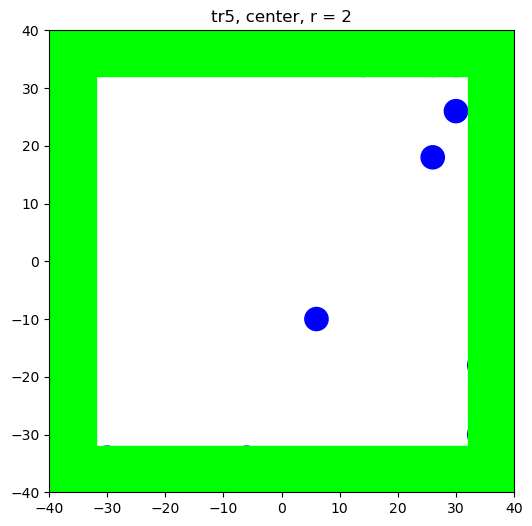

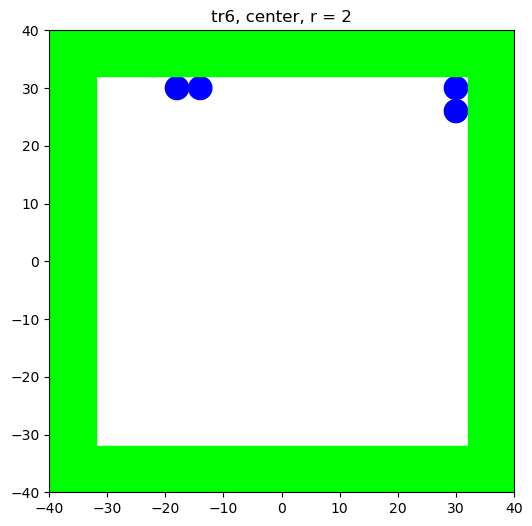

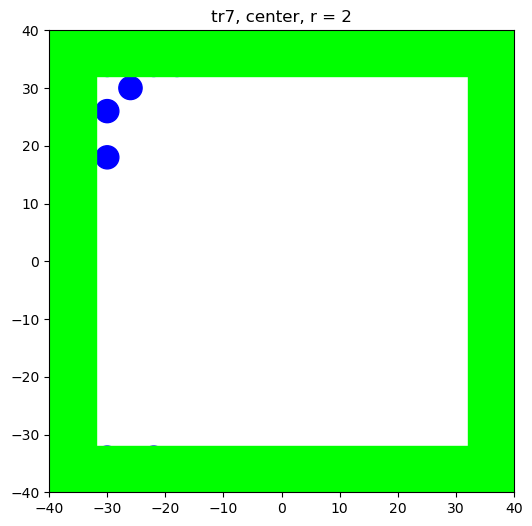

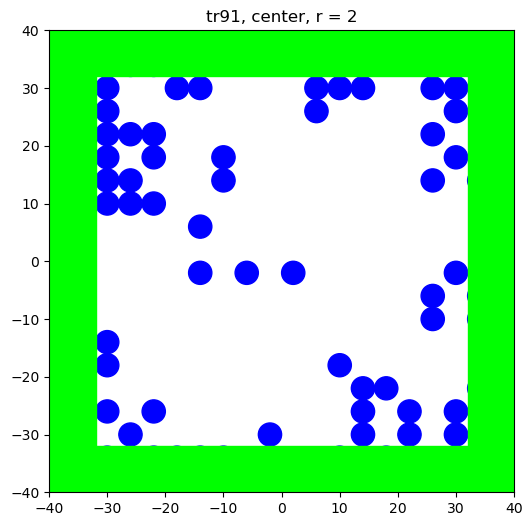

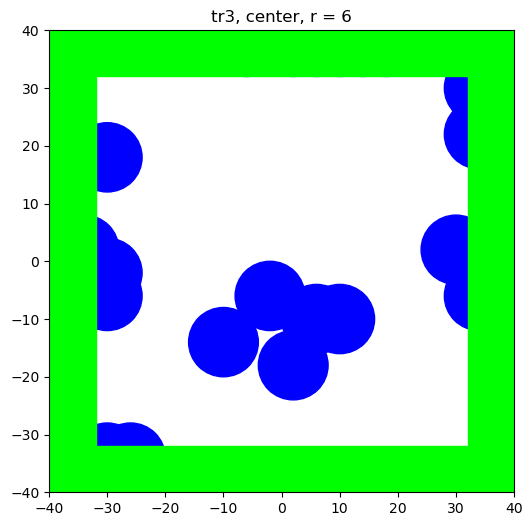

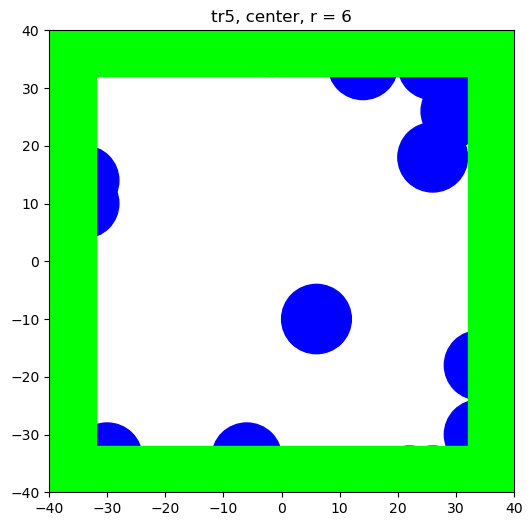

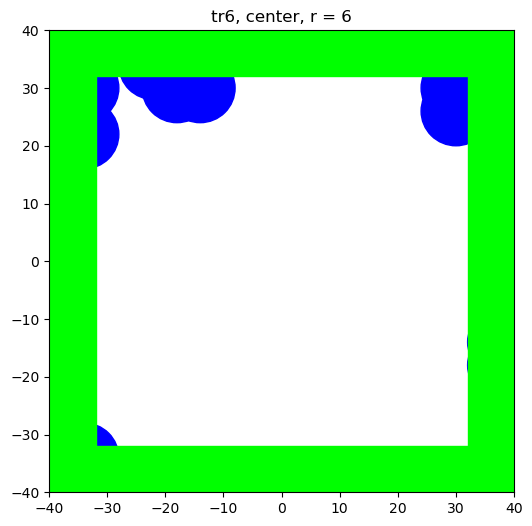

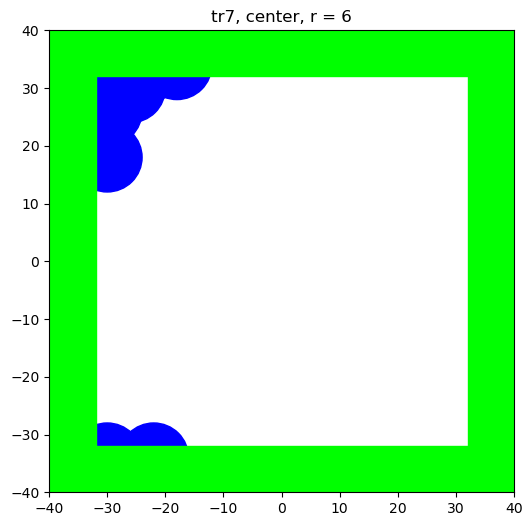

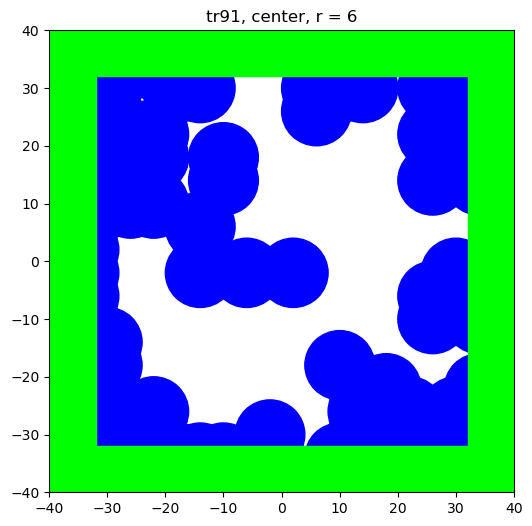

In [84]:
#уже можно не запускать
for r in [r1,r2]:
    for n in used_mice:
        fig, ax = plt.subplots(figsize=(6,6))
        patches = []
        coords = hm_marks_coords[n]
        for c in coords:
            circle = Circle((c[0], c[1]), r)
            patches.append(circle)
        p = PatchCollection(patches, alpha=1,color='blue')
        ax.add_collection(p)
        squares = [Rectangle((-40, -40), 8, 80), Rectangle((32, -40), 8, 80), Rectangle((-40, -40), 80, 8), \
                   Rectangle((-40, 32), 80, 8)]
        sq = PatchCollection(squares, alpha=1, color=(0, 1, 0))
        ax.add_collection(sq)
        plt.xlim(-40, 40)
        plt.ylim(-40, 40)
        name = n + ', center' + ', r = ' + str(r)
        plt.title(name)
        plt.savefig("C:\\Users\\Lenovo\\1navigation\\circles_2024_marks_surr\\"+name)
        plt.show()
        
        

from matplotlib.collections import PatchCollection
from matplotlib.patches import Circle

fig, ax = plt.subplots()

x = [-4, 0, 3]
y = [3, 0, -3]
radii = [1,2,0.5]
patches = []
for x1, y1, r in zip(x, y, radii):
    circle = Circle((x1, y1), r)
    patches.append(circle)

p = PatchCollection(patches, alpha=1,color='red')
#p.set_array(colors)
ax.add_collection(p)
plt.xlim(-5, 5)
plt.ylim(-5, 5)
fig.colorbar(p, ax=ax)

plt.show()


In [8]:
#10 размечаем в таблице траектории какие точки находятся в окрестностях r1 и r2 меток, а какие нет
#небыстро работающая функция!

def addNearMarksWalls(trN, trN_marks_coords, r1=2, r2=6):
    
    trN['r1'] = 0
    trN['r2'] = 0
    
    for i in range(len(trN)):
        for j in trN_marks_coords:
            if ((trN['x'].iloc[i] - j[0]) ** 2) + ((trN['y'].iloc[i] - j[1]) ** 2) < (r1 ** 2):
                trN['r1'].iloc[i] += 1
            if ((trN['x'].iloc[i] - j[0]) ** 2) + ((trN['y'].iloc[i] - j[1]) ** 2) <= (r2 ** 2):
                trN['r2'].iloc[i] += 1
    
#     trN['near_wall'] = 0
#     ylength = bord_trN['yma'] - bord_trN['ymi'] 
#     xlength = bord_trN['xma'] - bord_trN['xmi'] 
#     xl = bord_trN['xmi']  + xlength * 0.1
#     xr = bord_trN['xma']  - xlength * 0.1
#     yd = bord_trN['ymi']  + ylength * 0.1
#     yu = bord_trN['yma']  - ylength * 0.1
    
#     for i in range(len(trN)):
#         if (trN['x'].iloc[i] < xl) or (trN['x'].iloc[i] > xr) or (trN['y'].iloc[i] < yd) or (trN['y'].iloc[i] > yu):
#             trN['near_wall'].iloc[i] = 1
    
    return trN
    

In [33]:
dfs_splited_isnear_marks = {}
for m in used_mice:
    kk = []
    for df in splited_dfs[m]:
        kk.append(addNearMarksWalls(df, hm_marks_coords[m], r1=2, r2=6))
        dfs_splited_isnear_marks[m] = kk
    

# # Save distributions

with open('splited_isnear_marks.pkl', 'wb') as fp:    
    pickle.dump(dfs_splited_isnear_marks, fp)

          
    #dfs_small_isnear_marks[n] = addNearMarksWalls(dfs_small[n], hm_marks_coords[n]) 
    
    

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_712\1934679815.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trN['r1'] = 0
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_712\1934679815.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trN['r2'] = 0
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_712\1934679815.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexin

In [14]:
#11. open dfs_splited_isnear_marks if we skipped steps 0-4, 9-10

In [9]:
with open('splited_isnear_marks.pkl', 'rb') as fp:
    dfs_splited_isnear_marks = pickle.load(fp)

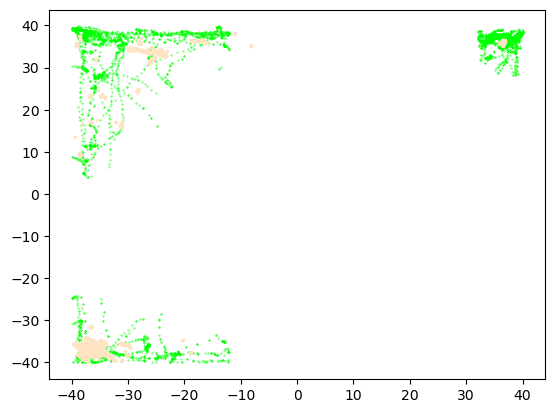

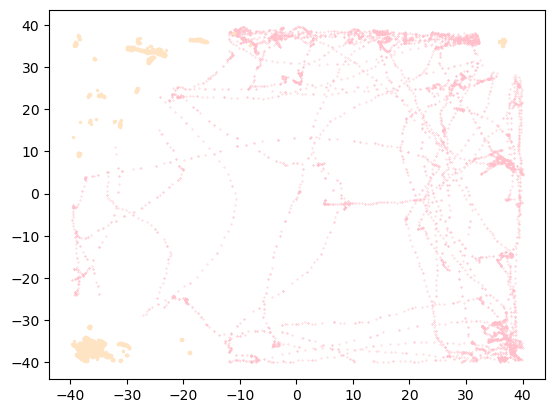

In [16]:
#check surrounding of marks
check = dfs_splited_isnear_marks['tr7'][0].loc[(dfs_splited_isnear_marks['tr7'][0]['r2']>0) & (dfs_splited_isnear_marks['tr7'][0]['r1']>=0)]
plt.scatter(check['x'], check['y'], s=0.1, c='lime')
plt.scatter(marks['tr7']['df']['y'],marks['tr7']['df']['x'],s=2, c='bisque')
plt.figure()
check1 = dfs_splited_isnear_marks['tr7'][0].loc[(dfs_splited_isnear_marks['tr7'][0]['r2']==0) & (dfs_splited_isnear_marks['tr7'][0]['r1']==0)]
plt.scatter(check1['x'], check1['y'], s=0.1, c='pink')
plt.scatter(marks['tr7']['df']['y'],marks['tr7']['df']['x'],s=2, c='bisque')

In [23]:
#12 compare navigation parameters between marks surroundings and the remaining area

In [38]:
#make df with percent of samples, percent of pauses, velocities in marks surroundings and the remaining area

#walls

navig_pars_walls = pd.DataFrame()

for n, trs in dfs_splited_isnear_marks.items():
    for i in range(len(trs)):
        tr = trs[i]
        m1 = len(tr.loc[(tr['r1']>0) & (tr['near_wall']>0)]) / len(tr)
        m2 = len(tr.loc[(tr['r1']==0) & (tr['r2'] > 0) & (tr['near_wall']>0)]) / len(tr)
        m3 = len(tr.loc[(tr['r1']==0) & (tr['r2'] == 0) & (tr['near_wall']>0)]) / len(tr)
        
        tr_p = tr.loc[tr['movement']=='Stop']
        p1 = len(tr_p.loc[(tr_p['r1']>0) & (tr_p['near_wall']>0)]) / len(tr_p)
        p2 = len(tr_p.loc[(tr_p['r1']==0) & (tr_p['r2'] > 0) & (tr_p['near_wall']>0)]) / len(tr_p)
        p3 = len(tr_p.loc[(tr_p['r1']==0) & (tr_p['r2'] == 0) & (tr_p['near_wall']>0)]) / len(tr_p)
        
        v1 = tr.loc[(tr['r1']>0) & (tr['near_wall']>0)]['V'].mean()
        v2 = tr.loc[(tr['r1']==0) & (tr['r2'] > 0) & (tr['near_wall']>0)]['V'].mean()
        v3 = tr.loc[(tr['r1']==0) & (tr['r2'] == 0) & (tr['near_wall']>0)]['V'].mean()
        
        vv1 = tr.loc[(tr['r1']>0) & (tr['near_wall']>0)]['V'].to_numpy()
        vv2 = tr.loc[(tr['r1']==0) & (tr['r2'] > 0) & (tr['near_wall']>0)]['V'].to_numpy()
        vv3 = tr.loc[(tr['r1']==0) & (tr['r2'] == 0) & (tr['near_wall']>0)]['V'].to_numpy()

        lildf_np = pd.DataFrame({'mouse':[n, n, n], 'time_part':[i+1, i+1, i+1], 'near_mark':['r1','r2','0'], 
                                 'near_wall/near_wall':['near_wall','near_wall','near_wall'], 
                                 'percent_of_samp':[m1,m2,m3],
                                 'pers_of_pause': [p1, p2, p3],
                                 'mean_v':[v1,v2,v3],'all_v':[vv1, vv2, vv3]})
        navig_pars_walls = navig_pars_walls.append(lildf_np)
            
navig_pars_walls = navig_pars_walls.reset_index(drop=True)


#чтобы посчитать нормально разницу между разными зонами я переношу их в excel и делю на площадь


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_3744\4195885421.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  navig_pars_walls = navig_pars_walls.append(lildf_np)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_3744\4195885421.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  navig_pars_walls = navig_pars_walls.append(lildf_np)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_3744\4195885421.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  navig_pars_walls = navig_pars_walls.append(lildf_np)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_3744\4195885421.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  navig_pars_walls = navig_pars

In [36]:
#center

navig_pars_center = pd.DataFrame()

for n, trs in dfs_splited_isnear_marks.items():
    for i in range(len(trs)):
        tr = trs[i]

        m1 = len(tr.loc[(tr['r1']>0) & (tr['near_wall']==0)]) / len(tr)
        m2 = len(tr.loc[(tr['r1']==0) & (tr['r2'] > 0) & (tr['near_wall']==0)]) / len(tr)
        m3 = len(tr.loc[(tr['r1']==0) & (tr['r2'] == 0) & (tr['near_wall']==0)]) / len(tr)
        
        tr_p = tr.loc[tr['movement']=='Stop']
        p1 = len(tr_p.loc[(tr_p['r1']>0) & (tr_p['near_wall']==0)]) / len(tr_p)
        p2 = len(tr_p.loc[(tr_p['r1']==0) & (tr_p['r2'] > 0) & (tr_p['near_wall']==0)]) / len(tr_p)
        p3 = len(tr_p.loc[(tr_p['r1']==0) & (tr_p['r2'] == 0) & (tr_p['near_wall']==0)]) / len(tr_p)
        
        v1 = tr.loc[(tr['r1']>0) & (tr['near_wall']==0)]['V'].mean()
        v2 = tr.loc[(tr['r1']==0) & (tr['r2'] > 0) & (tr['near_wall']==0)]['V'].mean()
        v3 = tr.loc[(tr['r1']==0) & (tr['r2'] == 0) & (tr['near_wall']==0)]['V'].mean()
        
        vv1 = tr.loc[(tr['r1']>0) & (tr['near_wall']==0)]['V'].to_numpy()
        vv2 = tr.loc[(tr['r1']==0) & (tr['r2'] > 0) & (tr['near_wall']==0)]['V'].to_numpy()
        vv3 = tr.loc[(tr['r1']==0) & (tr['r2'] == 0) & (tr['near_wall']==0)]['V'].to_numpy()

        lildf_np = pd.DataFrame({'mouse':[n, n, n], 'time_part':[i+1, i+1, i+1], 'near_mark':['r1','r2','0'], 
                                'near_wall/center':['center','center','center'], 
                                 'percent_of_samp':[m1,m2,m3],
                                 'pers_of_pause': [p1, p2, p3],
                                'mean_v':[v1,v2,v3],'all_v':[vv1, vv2, vv3]})
        navig_pars_center = navig_pars_center.append(lildf_np)
            
navig_pars_center = navig_pars_center.reset_index(drop=True)


#чтобы посчитать нормально разницу между разными зонами я переношу их в excel и делю на площадь


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_3744\401847708.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  navig_pars_center = navig_pars_center.append(lildf_np)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_3744\401847708.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  navig_pars_center = navig_pars_center.append(lildf_np)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_3744\401847708.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  navig_pars_center = navig_pars_center.append(lildf_np)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_3744\401847708.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  navig_pars_center = navig_p

In [40]:
#mean velocities near wall

df = navig_pars_wall.loc[navig_pars_wall['time_part']==1]
print('time part 1, near_wall')
v_r1 = df.loc[df['near_mark']=='r1']['mean_v']
v_r2 = df.loc[df['near_mark']=='r2']['mean_v']
v_0 = df.loc[df['near_mark']=='0']['mean_v']
print('v_r1', ' ', mean(v_r1), '\n','v_r2', ' ', mean(v_r2), '\n', 'v_0', ' ', mean(v_0), '\n',sep='')
# print('r1, r2', ttest_ind(v_r1, v_r2))
# print('0, r1', ttest_ind(v_0, v_r1))
# print('0, r2', ttest_ind(v_0, v_r2))

df = navig_pars_wall.loc[navig_pars_wall['time_part']==2]
print('time part 2, near_wall')
v_r1 = df.loc[df['near_mark']=='r1']['mean_v']
v_r2 = df.loc[df['near_mark']=='r2']['mean_v']
v_0 = df.loc[df['near_mark']=='0']['mean_v']
print('v_r1', ' ', mean(v_r1), '\n','v_r2', ' ', mean(v_r2), '\n', 'v_0', ' ', mean(v_0), '\n',sep='')

df = navig_pars_wall.loc[navig_pars_wall['time_part']==3]
print('time part 3, near_wall')
v_r1 = df.loc[df['near_mark']=='r1']['mean_v']
v_r2 = df.loc[df['near_mark']=='r2']['mean_v']
v_0 = df.loc[df['near_mark']=='0']['mean_v']
print('v_r1', ' ', mean(v_r1), '\n','v_r2', ' ', mean(v_r2), '\n', 'v_0', ' ', mean(v_0), '\n',sep='')

time part 1, near_wall
v_r1 7.0854442416070835
v_r2 9.364252216598741
v_0 12.499077031489186

time part 2, near_wall
v_r1 7.132542340849563
v_r2 10.4476420233558
v_0 13.599534338089375

time part 3, near_wall
v_r1 6.228164619252433
v_r2 9.073948845529456
v_0 11.08537174289897



In [41]:
#mean velocities center

df = navig_pars_center.loc[navig_pars_center['time_part']==1]
print('time part 1, near_wall')
v_r1 = df.loc[df['near_mark']=='r1']['mean_v']
v_r2 = df.loc[df['near_mark']=='r2']['mean_v']
v_0 = df.loc[df['near_mark']=='0']['mean_v']
print('v_r1', ' ', mean(v_r1), '\n','v_r2', ' ', mean(v_r2), '\n', 'v_0', ' ', mean(v_0), '\n',sep='')
# print('r1, r2', ttest_ind(v_r1, v_r2))
# print('0, r1', ttest_ind(v_0, v_r1))
# print('0, r2', ttest_ind(v_0, v_r2))

df = navig_pars_center.loc[navig_pars_center['time_part']==2]
print('time part 2, near_wall')
v_r1 = df.loc[df['near_mark']=='r1']['mean_v']
v_r2 = df.loc[df['near_mark']=='r2']['mean_v']
v_0 = df.loc[df['near_mark']=='0']['mean_v']
print('v_r1', ' ', mean(v_r1), '\n','v_r2', ' ', mean(v_r2), '\n', 'v_0', ' ', mean(v_0), '\n',sep='')

df = navig_pars_center.loc[navig_pars_center['time_part']==3]
print('time part 3, near_wall')
v_r1 = df.loc[df['near_mark']=='r1']['mean_v']
v_r2 = df.loc[df['near_mark']=='r2']['mean_v']
v_0 = df.loc[df['near_mark']=='0']['mean_v']
print('v_r1', ' ', mean(v_r1), '\n','v_r2', ' ', mean(v_r2), '\n', 'v_0', ' ', mean(v_0), '\n',sep='')

time part 1, near_wall
v_r1 nan
v_r2 20.40554557257709
v_0 17.36593508490693

time part 2, near_wall
v_r1 18.32294966845268
v_r2 15.12654644513732
v_0 16.361547392623944

time part 3, near_wall
v_r1 17.01864399318324
v_r2 13.22710576952831
v_0 14.280211437237961



In [43]:
navig_pars_wall.to_excel('navig_pars_wall.xlsx')
navig_pars_center.to_excel('navig_pars_center.xlsx')

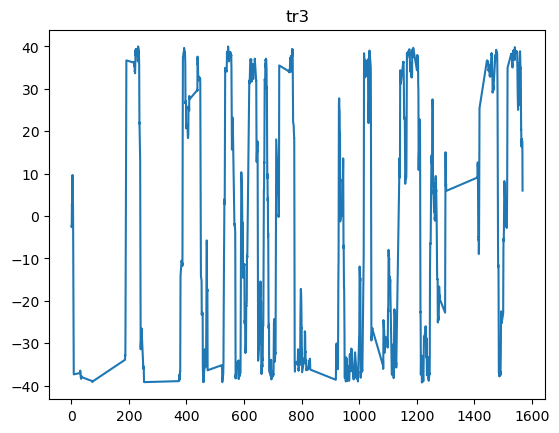

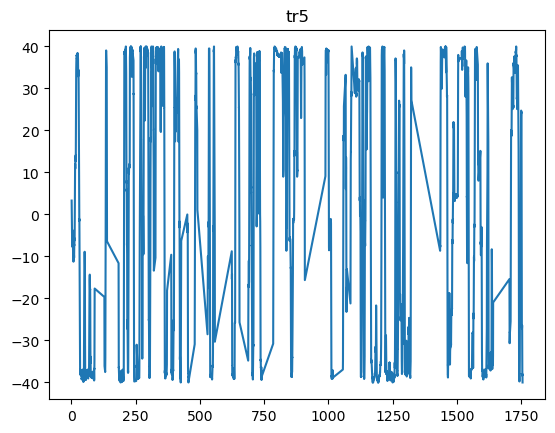

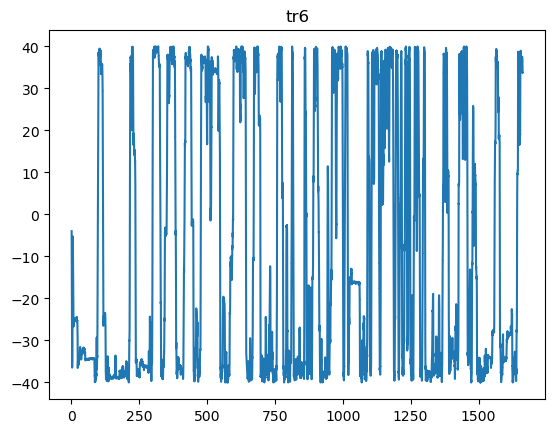

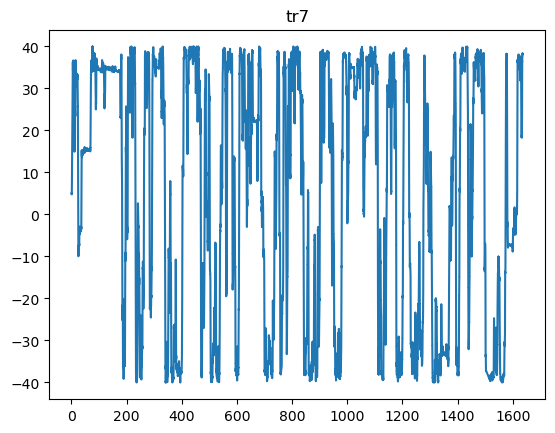

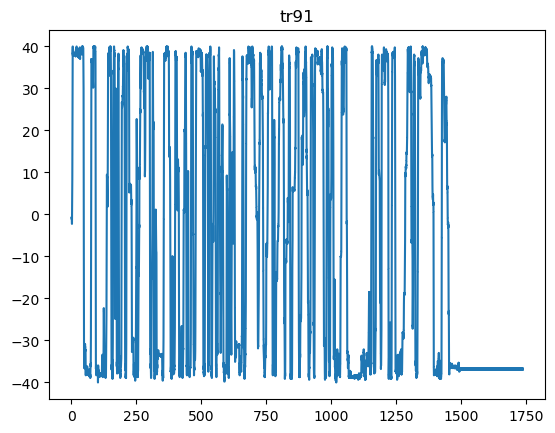

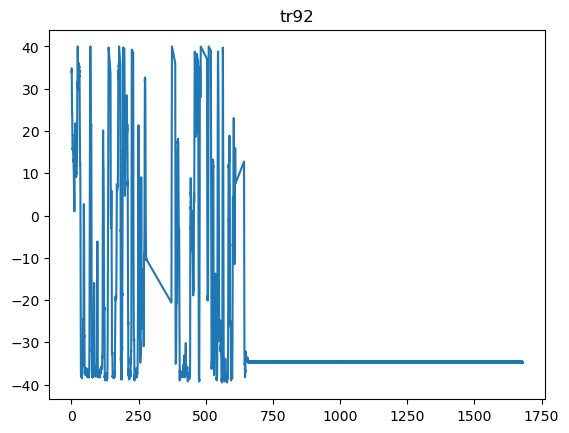

In [20]:
for i in ['tr3','tr5','tr6','tr7', 'tr91', 'tr92']:
    plt.plot(merg_dfs_dict[i]['time'],merg_dfs_dict[i]['x'])
    plt.title(i)
    plt.show()

In [113]:
#на вход нужна таблица с time x y 
# _1_ окууп карта меток dfHM
#блин бин х это y с тз траджа... ну аутпут беру верный. Хотя щас уже наоборот...

#parameter to change!!!!! n

def make_occup_map(marks_i, xmi=-40, xma=40, ymi=-40, yma=40, n=20):
    df = marks_i['df']
    binx = np.linspace(xmi, xma, n+1)
    #x_cut = pd.cut(df.X, binx, right=False)
    x_cut = pd.cut(df['x'], binx, right=False)

    biny = np.linspace(ymi, yma, n+1)
    #y_cut = pd.cut(df.Y, biny, right=False)
    y_cut = pd.cut(df['y'], biny, right=False)

    dfn = df.groupby([x_cut, y_cut]).count()
    
    L = [(a.mid, b.mid) for a, b in dfn.index]
    dfm = dfn.set_index(pd.MultiIndex.from_tuples(L, names=dfn.index.names))
    dfm = dfm.drop(columns=['x','y', 'green', 'blue'])
    dd = dfm.unstack()
    dd = dd.replace(0, 1.e-1)
    arrd = dd.to_numpy()
    arrsrsr = np.sqrt(np.sqrt(np.sqrt(arrd)))
    kk = (arrsrsr - np.amin(arrsrsr)) / (np.amax(arrsrsr) - np.amin(arrsrsr))
    kk = pd.DataFrame(kk)
    kk = kk.iloc[::-1]
    #kk = kk.iloc[:, ::-1]
    sns.heatmap(kk, square=True)
    #sns.heatmap(kk, square=True, xticklabels=False, yticklabels=False)
    return(kk, binx, biny)


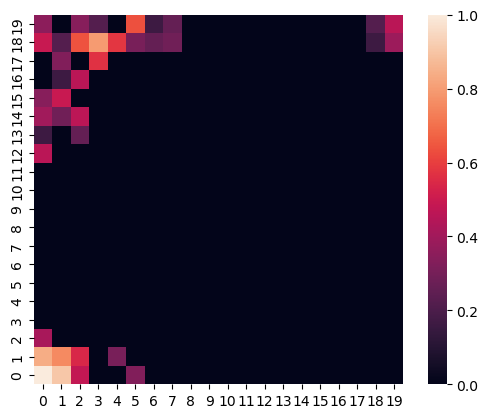

In [114]:
dfHM, biny, binx = make_occup_map(marks['tr7'])

In [115]:
# _2_ оккуп карта с индексами-координатами

binxmid = []
for i in range(len(binx)):
    if i != 0:
        binxmid.append((binx[i]+binx[i-1])/2)

binymid = []
for i in range(len(biny)):
    if i != 0:
        binymid.append((biny[i]+biny[i-1])/2)

dfHM.index = binxmid[::-1]
dfHM.columns = binymid

dfHM
        

,-38.0,-34.0,-30.0,-26.0,-22.0,-18.0,-14.0,-10.0,-6.0,-2.0,2.0,6.0,10.0,14.0,18.0,22.0,26.0,30.0,34.0,38.0
38.0,0.355072,0.000000,0.341136,0.221123,0.000000,0.634099,0.162367,0.257929,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.221123,0.457239
34.0,0.488714,0.221123,0.639334,0.794292,0.579544,0.307035,0.257929,0.285198,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.162367,0.389261
30.0,0.000000,0.325335,0.000000,0.566417,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
26.0,0.000000,0.162367,0.457239,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
22.0,0.341136,0.493327,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
18.0,0.398842,0.285198,0.463015,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
14.0,0.162367,0.000000,0.257929,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
10.0,0.457239,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
6.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
2.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000


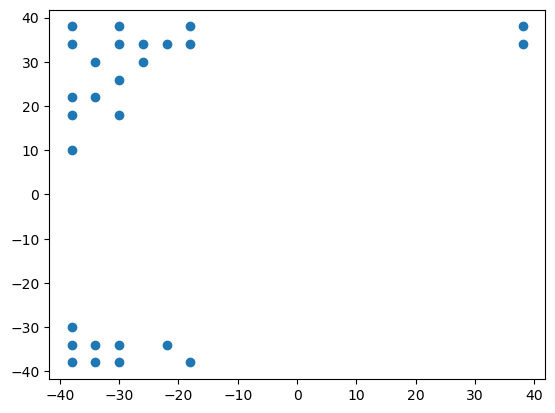

In [116]:
# _3_ вытащим координаты квадратов где довольно много меток
#координаты меток
#старое: т е i это y (row) а j это x (column)
#новое!! i это x (row) а j это y (column)
#parameter to change 0.3
tr7_coords = []
for i in range(dfHM.shape[0]-1, -1, -1):
    for j in range(dfHM.shape[1]):
        if dfHM.iloc[i, j] > 0.3:
            #print(dfHM.index[i], dfHM.columns[j])
            tr7_coords.append((dfHM.columns[j], dfHM.index[i]))
            



C:\Users\Lenovo\AppData\Local\Temp\ipykernel_180\1764278431.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tr7['r2'].iloc[i] += 1
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_180\1764278431.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tr7['r1'].iloc[i] += 1


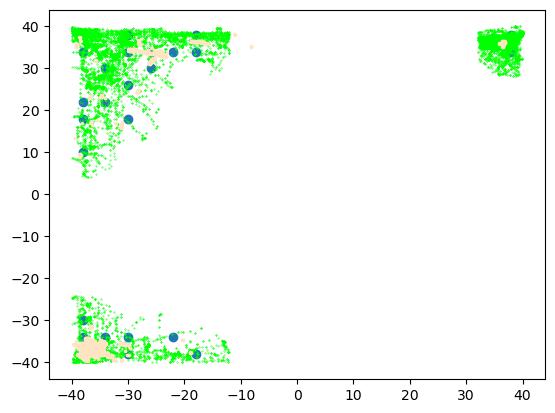

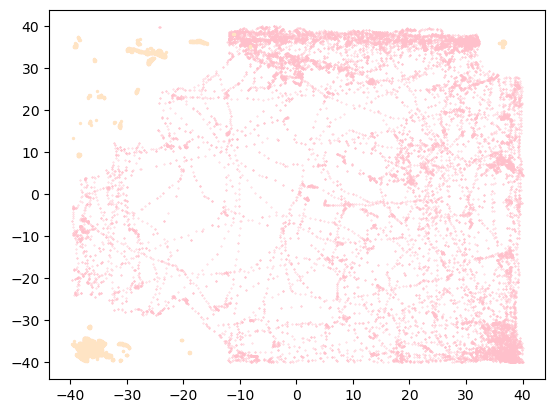

In [112]:
# _4_ для каждой точки определим, находится ли она в р1 р2 
r1 = 2
r2 = 3 * r1

tr7 = merg_dfs_dict['tr7']
tr7['r1'] = 0
tr7['r2'] = 0

for i in range(len(tr7)):
    for j in tr7_coords:
        if ((tr7['x'].iloc[i] - j[0]) ** 2) + ((tr7['y'].iloc[i] - j[1]) ** 2) < (r1 ** 2):
            tr7['r1'].iloc[i] += 1
        if ((tr7['x'].iloc[i] - j[0]) ** 2) + ((tr7['y'].iloc[i] - j[1]) ** 2) <= (r2 ** 2):
            tr7['r2'].iloc[i] += 1
            

check = tr7.loc[(tr7['r2']>0) & (tr7['r1']>=0)]
plt.scatter(check['x'], check['y'], s=0.1, c='lime')
plt.scatter(marks['tr7']['df']['y'],marks['tr7']['df']['x'],s=2, c='bisque')
plt.figure()
check1 = tr7.loc[(tr7['r2']==0) & (tr7['r1']==0)]
plt.scatter(check1['x'], check1['y'], s=0.1, c='pink')
plt.scatter(marks['tr7']['df']['y'],marks['tr7']['df']['x'],s=2, c='bisque')


In [ ]:
for i in ['tr91']:
    fig, ax = plt.subplots()
    plt.plot(merg_dfs_dict[i]['time'],merg_dfs_dict[i]['x'])
    plt.title(i)
    ax.set_xlim(1450, 1454)
    plt.show()
    

# старый черновик 

### попробуем оценить точки остановок

ой нет завтра...

In [15]:

##4. последние 10 минут - строим по ним остановки, добавляем в словарь steps_xx_yy = {} - старое

# def cut10min(df):
#     t2 = df['time'].max()
#     t1 = t2 - 600
#     df = df.loc[(df['time'] > t1) & (df['time'] < t2)]
#     return df

# dfs_small = {}
# for i in ['tr3','tr5','tr6','tr7']:
#     dfs_small[i] = cut10min(merg_dfs_dict[i])

# dfs_small['tr91'] = merg_dfs_dict['tr91'].loc[(merg_dfs_dict['tr91']['time'] > 860) & (merg_dfs_dict['tr91']['time'] < 1460)]

# dfs_small['tr92'] = merg_dfs_dict['tr92'].loc[(merg_dfs_dict['tr92']['time'] > 55) & (merg_dfs_dict['tr92']['time'] < 655)]
    
# ##4. последние 10 минут - строим по ним остановки, добавляем в словарь steps_xx_yy = {} - старое
​
# def cut10min(df):
#     t2 = df['time'].max()
#     t1 = t2 - 600
#     df = df.loc[(df['time'] > t1) & (df['time'] < t2)]
#     return df
​
# dfs_small = {}
# for i in ['tr3','tr5','tr6','tr7']:
#     dfs_small[i] = cut10min(merg_dfs_dict[i])
​
# dfs_small['tr91'] = merg_dfs_dict['tr91'].loc[(merg_dfs_dict['tr91']['time'] > 860) & (merg_dfs_dict['tr91']['time'] < 1460)]
​
# dfs_small['tr92'] = merg_dfs_dict['tr92'].loc[(merg_dfs_dict['tr92']['time'] > 55) & (merg_dfs_dict['tr92']['time'] < 655)]
    
# #не совсем понятно, зачем мне нужен словарь steps_small!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
# steps_small = {}
# for i in dfs_small:
#     steps_small[i] = dictOfRuns(dfs_small[i])
    


SyntaxError: invalid non-printable character U+200B (2674590078.py, line 18)

In [486]:
print(r1_3, r1_5, r1_6, r1_7)

2.348750000000001 2.4938000000000002 2.215 1.821250000000001


In [493]:
tr3_coords

[(-40.89, -44.7725),
 (-36.15, -44.7725),
 (-31.41, -44.7725),
 (-26.669999999999998, -44.7725),
 (-40.89, -40.11750000000001),
 (-36.15, -40.11750000000001),
 (-31.41, -40.11750000000001),
 (1.7700000000000031, -21.497500000000002),
 (-12.45, -16.84250000000001),
 (-45.629999999999995, -12.187500000000007),
 (6.510000000000002, -12.187500000000007),
 (11.250000000000004, -12.187500000000007),
 (-40.89, -7.532500000000006),
 (-36.15, -7.532500000000006),
 (-2.9699999999999953, -7.532500000000006),
 (39.690000000000005, -7.532500000000006),
 (-40.89, -2.877500000000005),
 (-36.15, -2.877500000000005),
 (-40.89, 1.7774999999999928),
 (34.95, 1.7774999999999928),
 (44.43, 1.7774999999999928),
 (-36.15, 20.397499999999987),
 (39.690000000000005, 25.052499999999988),
 (39.690000000000005, 34.36249999999999),
 (39.690000000000005, 39.01749999999999),
 (44.43, 39.01749999999999),
 (-7.709999999999997, 43.6725),
 (1.7700000000000031, 43.6725),
 (6.510000000000002, 43.6725),
 (11.25000000000000

In [ ]:
for i in range(len(trN)):
        for j in trN_coords:
            if ((trN['x'].iloc[i] - j[0]) ** 2) + ((trN['y'].iloc[i] - j[1]) ** 2) < (r1 ** 2):
                trN['r1'].iloc[i] += 1
            if ((trN['x'].iloc[i] - j[0]) ** 2) + ((trN['y'].iloc[i] - j[1]) ** 2) <= (r2 ** 2):
                trN['r2'].iloc[i] += 1

In [497]:
xx = steps_xx_yy_tt['tr3'][0]
yy = steps_xx_yy_tt['tr3'][1]
tt = steps_xx_yy_tt['tr3'][2]

In [500]:
zipped = list(zip(xx, yy, tt))

paus3 = pd.DataFrame(zipped, columns=['x', 'y', 'duration'])

In [506]:
paus3['r1'] = 0
paus3['r2'] = 0
r2_3 = 3 * r1_3
for i in range(len(paus3)):
        for j in tr3_coords:
            if ((paus3['x'].iloc[i] - j[0]) ** 2) + ((paus3['y'].iloc[i] - j[1]) ** 2) < (r1_3 ** 2):
                paus3['r1'].iloc[i] += 1
            if ((paus3['x'].iloc[i] - j[0]) ** 2) + ((paus3['y'].iloc[i] - j[1]) ** 2) <= (r2_3 ** 2):
                paus3['r2'].iloc[i] += 1

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_23524\1650486570.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  paus3['r2'].iloc[i] += 1
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_23524\1650486570.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  paus3['r1'].iloc[i] += 1


In [519]:
print(len(paus3.loc[paus3['r1']>0]))
print(len(paus3.loc[(paus3['r1']==0) & (paus3['r2']>0)]))
print(len(paus3.loc[(paus3['r1']==0) & (paus3['r2']==0)]))
print(paus3.loc[paus3['r1']>0]['duration'].mean())
print(paus3.loc[(paus3['r1']==0) & (paus3['r2']>0)]['duration'].mean())
print(paus3.loc[(paus3['r1']==0) & (paus3['r2']==0)]['duration'].mean())


1
11
16
2.668999999999869
3.094090909090927
2.7443749999999767


In [521]:
def justotv(steps_xx_yy_ttN, coords, r1):
    xx = steps_xx_yy_ttN[0]
    yy = steps_xx_yy_ttN[1]
    tt = steps_xx_yy_ttN[2]
    zipped = list(zip(xx, yy, tt))
    paus = pd.DataFrame(zipped, columns=['x', 'y', 'duration'])
    
    paus['r1'] = 0
    paus['r2'] = 0
    r2 = 3 * r1
    for i in range(len(paus)):
            for j in coords:
                if ((paus['x'].iloc[i] - j[0]) ** 2) + ((paus['y'].iloc[i] - j[1]) ** 2) < (r1 ** 2):
                    paus['r1'].iloc[i] += 1
                if ((paus['x'].iloc[i] - j[0]) ** 2) + ((paus['y'].iloc[i] - j[1]) ** 2) <= (r2 ** 2):
                    paus['r2'].iloc[i] += 1
    print(len(paus.loc[paus['r1']>0]))
    print(len(paus.loc[(paus['r1']==0) & (paus['r2']>0)]))
    print(len(paus.loc[(paus['r1']==0) & (paus['r2']==0)]))
    print(paus.loc[paus['r1']>0]['duration'].mean())
    print(paus.loc[(paus['r1']==0) & (paus['r2']>0)]['duration'].mean())
    print(paus.loc[(paus['r1']==0) & (paus['r2']==0)]['duration'].mean())


In [523]:
justotv(steps_xx_yy_tt['tr3'], tr3_coords, r1_3)

1
11
16
2.668999999999869
3.094090909090927
2.7443749999999767


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_23524\2345280229.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  paus['r2'].iloc[i] += 1
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_23524\2345280229.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  paus['r1'].iloc[i] += 1


In [524]:
justotv(steps_xx_yy_tt['tr5'], tr5_coords, r1_5)

19
27
39
2.9397894736842223
1.752407407407384
1.277358974358998


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_23524\2345280229.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  paus['r2'].iloc[i] += 1
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_23524\2345280229.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  paus['r1'].iloc[i] += 1


In [525]:
justotv(steps_xx_yy_tt['tr6'], tr6_coords, r1_6)

23
35
69
1.7771304347826296
2.4404571428571344
2.286913043478261


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_23524\2345280229.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  paus['r2'].iloc[i] += 1
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_23524\2345280229.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  paus['r1'].iloc[i] += 1


In [526]:
justotv(steps_xx_yy_tt['tr7'], tr7_coords, r1_7)

20
29
72
3.268299999999999
3.0548620689655213
2.3472777777777925


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_23524\2345280229.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  paus['r1'].iloc[i] += 1
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_23524\2345280229.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  paus['r2'].iloc[i] += 1


### попробуем вставить углы и оценить смену уголов

In [349]:
import math

In [438]:
#мы добавляем фильтр скорость и НЕФИЛЬТРОВАННЫЕ углы
def addFilteredV(df):
    vx = []
    vy = []
    v = []
    ang = []
    boo = True
    for i in range(len(df)):
        if i == 0:
            vx.append(0)
            vy.append(0)
            v.append(0)
        else:
            dx = df['x'][i]-df['x'][i-1]
            dy = df['y'][i]-df['y'][i-1]
            dt = df['time'][i]-df['time'][i-1]
            vvx = dx/dt
            vvy = dy/dt
            vv = pow(pow(vvx, 2) + pow(vvy, 2), 0.5)
            vx.append(vvx)
            vy.append(vvy)
            v.append(vv)
            # угол
            #хз что делать с 0
            x = vvy/vvx
            if vvx >= 0:
                res = math.degrees(math.atan(x))
            else:
                res = 180 + math.degrees(math.atan(x))
            if res <= 0:
                res = -res + 90
            elif res > 0:
                res = 360 - res + 90
            if res >= 360:
                res -= 360
            ang.append(res)
            if boo:
                ang.append(res)
                boo = False
    df.insert(3, "Vx", vx)
    df.insert(4, "Vy", vy)
    df.insert(5, "V", v)
    df.insert(6, "angles", ang)
    #df['V'] = pd.Series(gaussian_filter1d(df['V'], 5))
    #df['Vx'] = pd.Series(gaussian_filter1d(df['Vx'], 5))
    #df['Vy'] = pd.Series(gaussian_filter1d(df['Vy'], 5))
    return(df)

In [439]:
dfs = [tr3, tr5, tr6, tr7]
names = ['tr3', 'tr5', 'tr6', 'tr7']

In [440]:
for i in range(len(dfs)):
    dfs[i] = dfs[i].dropna()

for i in range(len(dfs)):
    dfs[i] = dfs[i].reset_index()
    dfs[i] = dfs[i].drop(['index'], axis=1)
    dfs[i] = addFilteredV(dfs[i])

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_23524\1752943733.py:25: RuntimeWarning: invalid value encountered in double_scalars
  x = vvy/vvx
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_23524\1752943733.py:25: RuntimeWarning: divide by zero encountered in double_scalars
  x = vvy/vvx
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_23524\1752943733.py:25: RuntimeWarning: invalid value encountered in double_scalars
  x = vvy/vvx
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_23524\1752943733.py:25: RuntimeWarning: divide by zero encountered in double_scalars
  x = vvy/vvx
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_23524\1752943733.py:25: RuntimeWarning: invalid value encountered in double_scalars
  x = vvy/vvx
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_23524\1752943733.py:25: RuntimeWarning: divide by zero encountered in double_scalars
  x = vvy/vvx
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_23524\1752943733.py:25: RuntimeWarning: invalid value encountered in double_scalars
  x = vvy/

In [441]:
for i in range(len(dfs)):
    dfs[i] = dfs[i].dropna()

In [442]:
for i in range(len(dfs)):
    dfs[i] = dfs[i].reset_index()
    dfs[i] = dfs[i].drop(['index'], axis=1)
    dfs[i]['anglesNew'] = pd.Series(gaussian_filter1d(dfs[i]['angles'], 5))

In [443]:
for i in range(len(dfs)):
    dfs[i].loc[0, 'delta_angle_abs'] = 0
    for j in range(1, len(dfs[i])):
        dfs[i].loc[j, 'delta_angle_abs'] = abs(dfs[i].loc[j-1, 'anglesNew'] - dfs[i].loc[j, 'anglesNew'])

In [445]:
kek3 = dfs[0].loc[(dfs[0]['r1']>0) & (dfs[0]['near_wall']>0)]
print(kek3['delta_angle_abs'].mean())

kek3 = dfs[0].loc[(dfs[0]['r1']==0) & (dfs[0]['r2']>0) & (dfs[0]['near_wall']>0)]
print(kek3['delta_angle_abs'].mean())

kek3 = dfs[0].loc[(dfs[0]['r1']==0) & (dfs[0]['r2']==0) & (dfs[0]['near_wall']>0)]
print(kek3['delta_angle_abs'].mean())

4.9080734382337665
4.231054037882179
4.470186190487813


In [446]:
kek3 = dfs[0].loc[(dfs[0]['r1']>0) & (dfs[0]['near_wall']==0)]
print(kek3['delta_angle_abs'].mean())

kek3 = dfs[0].loc[(dfs[0]['r1']==0) & (dfs[0]['r2']>0) & (dfs[0]['near_wall']==0)]
print(kek3['delta_angle_abs'].mean())

kek3 = dfs[0].loc[(dfs[0]['r1']==0) & (dfs[0]['r2']==0) & (dfs[0]['near_wall']==0)]
print(kek3['delta_angle_abs'].mean())


2.9022288617873624
4.398877389025402
4.351229423981628


In [447]:
kek3 = dfs[1].loc[(dfs[1]['r1']>0) & (dfs[1]['near_wall']>0)]
print(kek3['delta_angle_abs'].mean())

kek3 = dfs[1].loc[(dfs[1]['r1']==0) & (dfs[1]['r2']>0) & (dfs[1]['near_wall']>0)]
print(kek3['delta_angle_abs'].mean())

kek3 = dfs[1].loc[(dfs[1]['r1']==0) & (dfs[1]['r2']==0) & (dfs[1]['near_wall']>0)]
print(kek3['delta_angle_abs'].mean())

kek3 = dfs[1].loc[(dfs[1]['r1']>0) & (dfs[1]['near_wall']==0)]
print(kek3['delta_angle_abs'].mean())

kek3 = dfs[1].loc[(dfs[1]['r1']==0) & (dfs[1]['r2']>0) & (dfs[1]['near_wall']==0)]
print(kek3['delta_angle_abs'].mean())

kek3 = dfs[1].loc[(dfs[1]['r1']==0) & (dfs[1]['r2']==0) & (dfs[1]['near_wall']==0)]
print(kek3['delta_angle_abs'].mean())


4.344788703546391
4.257334887568587
4.381030805342822
3.846230769946788
3.7596420671222264
3.767026942643553


In [448]:
kek3 = dfs[2].loc[(dfs[2]['r1']>0) & (dfs[2]['near_wall']>0)]
print(kek3['delta_angle_abs'].mean())

kek3 = dfs[2].loc[(dfs[2]['r1']==0) & (dfs[2]['r2']>0) & (dfs[2]['near_wall']>0)]
print(kek3['delta_angle_abs'].mean())

kek3 = dfs[2].loc[(dfs[2]['r1']==0) & (dfs[2]['r2']==0) & (dfs[2]['near_wall']>0)]
print(kek3['delta_angle_abs'].mean())

kek3 = dfs[2].loc[(dfs[2]['r1']>0) & (dfs[2]['near_wall']==0)]
print(kek3['delta_angle_abs'].mean())

kek3 = dfs[2].loc[(dfs[2]['r1']==0) & (dfs[2]['r2']>0) & (dfs[2]['near_wall']==0)]
print(kek3['delta_angle_abs'].mean())

kek3 = dfs[2].loc[(dfs[2]['r1']==0) & (dfs[2]['r2']==0) & (dfs[2]['near_wall']==0)]
print(kek3['delta_angle_abs'].mean())

4.085300454350067
4.195614585814751
3.9816953714377865
2.838050870722727
3.5646732810788313
3.4594013260544036


In [449]:
kek3 = dfs[3].loc[(dfs[3]['r1']>0) & (dfs[3]['near_wall']>0)]
print(kek3['delta_angle_abs'].mean())

kek3 = dfs[3].loc[(dfs[3]['r1']==0) & (dfs[3]['r2']>0) & (dfs[3]['near_wall']>0)]
print(kek3['delta_angle_abs'].mean())

kek3 = dfs[3].loc[(dfs[3]['r1']==0) & (dfs[3]['r2']==0) & (dfs[3]['near_wall']>0)]
print(kek3['delta_angle_abs'].mean())

kek3 = dfs[3].loc[(dfs[3]['r1']>0) & (dfs[3]['near_wall']==0)]
print(kek3['delta_angle_abs'].mean())

kek3 = dfs[3].loc[(dfs[3]['r1']==0) & (dfs[3]['r2']>0) & (dfs[3]['near_wall']==0)]
print(kek3['delta_angle_abs'].mean())

kek3 = dfs[3].loc[(dfs[3]['r1']==0) & (dfs[3]['r2']==0) & (dfs[3]['near_wall']==0)]
print(kek3['delta_angle_abs'].mean())

4.216166226832947
3.7839555025433675
3.9926815653481165
2.8050143115278114
4.053059624321675
4.571364037260944
